In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Data
#### First dataset with class unnamed

In [4]:
#load data and assigning 0.0 as NaN
df= pd.read_csv('C:/Users/19124/info_656/Assignment_03/Dataset/data.csv', na_values=['0.0'])

#read data
df.head(10)

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     NaN  2.017209  3.265527  5.478487  10.431999     NaN   
1   sample_1     NaN  0.592732  1.588421  7.586157   9.623011     NaN   
2   sample_2     NaN  3.511759  4.327199  6.881787   9.870730     NaN   
3   sample_3     NaN  3.663618  4.507649  6.659068  10.196184     NaN   
4   sample_4     NaN  2.655741  2.821547  6.539454   9.738265     NaN   
5   sample_5     NaN  3.467853  3.581918  6.620243   9.706829     NaN   
6   sample_6     NaN  1.224966  1.691177  6.572007   9.640511     NaN   
7   sample_7     NaN  2.854853  1.750478  7.226720   9.758691     NaN   
8   sample_8     NaN  3.992125  2.772730  6.546692  10.488252     NaN   
9   sample_9     NaN  3.642494  4.423558  6.849511   9.464466     NaN   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     NaN  ...    4.926711    8.210257    9.723516   
1  6.816049       NaN     NaN  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     NaN  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     NaN  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     NaN  ...    5.996032    8.891425   10.373790   
5  7.758510       NaN     NaN  ...    5.726657    8.602588    9.928339   
6  6.754888  0.531868     NaN  ...    5.105904    7.927968    9.673966   
7  5.952103       NaN     NaN  ...    5.297833    8.277092    9.599230   
8  7.690222  0.352307     NaN  ...    6.721974    9.597533    9.763753   
9  7.947216  0.724214     NaN  ...    6.020051    8.712809   10.259096   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   
5    6.096154    9.816001   11.556995    9.244150    9.836473    5.355133   
6    1.877744    9.802692   13.256060    9.664486    9.244219    8.330912   
7    5.244290    9.994339   12.670377    9.987733    9.216872    6.551490   
8    7.933278   10.952880   12.498919   10.389954   10.390255    7.828321   
9    6.131583    9.923582   11.144295    9.244851    9.484299    4.759151   

   gene_20530  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  

[10 rows x 20532 columns]

#### Counting Nan Values
#### Deleting columns with more than 15% NaN cells

In [5]:
#See number of NaN values in columns. I am selecting columns that contain more than 25% missing values in its total.
nulldf=df.isnull().sum() * 100 / len(df)>=15

#Creating a list with columns containg more than 15% missing values
nulldf1=pd.DataFrame(nulldf).drop(nulldf.index[0]).reset_index()
nulldf1.columns = ['Gene no','status']

#There are almost 2000 columns that contain more than 15% percent missing values in its total cells.
nulldf1.groupby('status').size()


status
False    16210
True      4321
dtype: int64

In [6]:
#Select columns that are true
dltcol=nulldf1.loc[nulldf1['status'] ==True]

#Convert to list so I could (copy-paste) later-on below to drop these columns, after we merge the two datasets
null_15 = dltcol["Gene no"].tolist()

#print(null_15)

#### Second dataset with classifications

In [8]:
#load classification names
df2= pd.read_csv('C:/Users/19124/info_656/Assignment_03/Dataset/labels.csv')

df2.head(5)

Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA

In [9]:
#How many labels we have?

df2.groupby('Class').size()

#Labels are the following 

Class
BRCA    300
COAD     78
KIRC    146
LUAD    141
PRAD    136
dtype: int64

#### Type of columns

In [10]:
#type of columns

df.dtypes.head(5)

Unnamed: 0     object
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
dtype: object

In [11]:
df2.dtypes

Unnamed: 0    object
Class         object
dtype: object

#### Merging two datasets to create new dataframs that contains labels and attributes

In [12]:
#Merging two datasets with common column
dfmer=pd.merge(df2, df, how='left', on="Unnamed: 0")

#Dropping unneccessary column
df3=dfmer.drop(columns=["Unnamed: 0"])

#Reading new dataframe
df3.head(5)
df3.groupby('Class').size()

Class
BRCA    300
COAD     78
KIRC    146
LUAD    141
PRAD    136
dtype: int64

In [13]:
df3.head(10)

Class  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0  PRAD     NaN  2.017209  3.265527  5.478487  10.431999     NaN  7.175175   
1  LUAD     NaN  0.592732  1.588421  7.586157   9.623011     NaN  6.816049   
2  PRAD     NaN  3.511759  4.327199  6.881787   9.870730     NaN  6.972130   
3  PRAD     NaN  3.663618  4.507649  6.659068  10.196184     NaN  7.843375   
4  BRCA     NaN  2.655741  2.821547  6.539454   9.738265     NaN  6.566967   
5  PRAD     NaN  3.467853  3.581918  6.620243   9.706829     NaN  7.758510   
6  KIRC     NaN  1.224966  1.691177  6.572007   9.640511     NaN  6.754888   
7  PRAD     NaN  2.854853  1.750478  7.226720   9.758691     NaN  5.952103   
8  BRCA     NaN  3.992125  2.772730  6.546692  10.488252     NaN  7.690222   
9  PRAD     NaN  3.642494  4.423558  6.849511   9.464466     NaN  7.947216   

     gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  0.591871     NaN  ...    4.926711    8.210257    9.723516    7.220030   
1       NaN     NaN  ...    4.593372    7.323865    9.740931    6.256586   
2  0.452595     NaN  ...    5.125213    8.127123   10.908640    5.401607   
3  0.434882     NaN  ...    6.076566    8.792959   10.141520    8.942805   
4  0.360982     NaN  ...    5.996032    8.891425   10.373790    7.181162   
5       NaN     NaN  ...    5.726657    8.602588    9.928339    6.096154   
6  0.531868     NaN  ...    5.105904    7.927968    9.673966    1.877744   
7       NaN     NaN  ...    5.297833    8.277092    9.599230    5.244290   
8  0.352307     NaN  ...    6.721974    9.597533    9.763753    7.933278   
9  0.724214     NaN  ...    6.020051    8.712809   10.259096    6.131583   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  
0    9.119813   12.003135    9.650743    8.921326    5.286759         NaN  
1    8.381612   12.674552   10.517059    9.397854    2.094168         NaN  
2    9.911597    9.045255    9.788359   10.090470    1.683023         NaN  
3    9.601208   11.392682    9.694814    9.684365    3.292001         NaN  
4    9.846910   11.922439    9.217749    9.461191    5.110372         NaN  
5    9.816001   11.556995    9.244150    9.836473    5.355133         NaN  
6    9.802692   13.256060    9.664486    9.244219    8.330912         NaN  
7    9.994339   12.670377    9.987733    9.216872    6.551490         NaN  
8   10.952880   12.498919   10.389954   10.390255    7.828321         NaN  
9    9.923582   11.144295    9.244851    9.484299    4.759151         NaN  

[10 rows x 20532 columns]

In [13]:
#Export Dataset for import later
df3.to_csv('Dataset/df_merged.csv')

#### New data with dropped columns

In [14]:
#Deleting all columns with more than 15% NaN cells
df4=df3.drop(columns=['gene_0', 'gene_5', 'gene_7', 'gene_8', 'gene_9', 'gene_10', 'gene_11', 'gene_13', 'gene_14', 'gene_15', 'gene_16', 'gene_17', 'gene_18', 'gene_21', 'gene_23', 'gene_24', 'gene_25', 'gene_26', 'gene_30', 'gene_31', 'gene_33', 'gene_36', 'gene_37', 'gene_39', 'gene_41', 'gene_42', 'gene_43', 'gene_44', 'gene_49', 'gene_74', 'gene_77', 'gene_84', 'gene_85', 'gene_108', 'gene_135', 'gene_168', 'gene_169', 'gene_173', 'gene_180', 'gene_185', 'gene_204', 'gene_207', 'gene_210', 'gene_219', 'gene_220', 'gene_222', 'gene_229', 'gene_235', 'gene_236', 'gene_237', 'gene_238', 'gene_239', 'gene_242', 'gene_254', 'gene_255', 'gene_266', 'gene_267', 'gene_274', 'gene_277', 'gene_282', 'gene_283', 'gene_284', 'gene_287', 'gene_288', 'gene_290', 'gene_302', 'gene_304', 'gene_321', 'gene_339', 'gene_341', 'gene_347', 'gene_350', 'gene_352', 'gene_353', 'gene_356', 'gene_357', 'gene_374', 'gene_382', 'gene_404', 'gene_405', 'gene_418', 'gene_442', 'gene_445', 'gene_448', 'gene_450', 'gene_451', 'gene_464', 'gene_465', 'gene_466', 'gene_479', 'gene_481', 'gene_493', 'gene_497', 'gene_507', 'gene_511', 'gene_516', 'gene_517', 'gene_518', 'gene_530', 'gene_561', 'gene_579', 'gene_582', 'gene_590', 'gene_595', 'gene_596', 'gene_603', 'gene_605', 'gene_606', 'gene_607', 'gene_608', 'gene_610', 'gene_616', 'gene_617', 'gene_619', 'gene_632', 'gene_636', 'gene_639', 'gene_657', 'gene_660', 'gene_662', 'gene_664', 'gene_671', 'gene_695', 'gene_700', 'gene_706', 'gene_707', 'gene_708', 'gene_710', 'gene_712', 'gene_713', 'gene_737', 'gene_742', 'gene_759', 'gene_764', 'gene_766', 'gene_779', 'gene_787', 'gene_824', 'gene_841', 'gene_842', 'gene_843', 'gene_845', 'gene_854', 'gene_856', 'gene_859', 'gene_860', 'gene_863', 'gene_864', 'gene_869', 'gene_881', 'gene_883', 'gene_884', 'gene_886', 'gene_892', 'gene_894', 'gene_918', 'gene_920', 'gene_921', 'gene_946', 'gene_956', 'gene_983', 'gene_992', 'gene_994', 'gene_1008', 'gene_1032', 'gene_1046', 'gene_1047', 'gene_1059', 'gene_1061', 'gene_1065', 'gene_1066', 'gene_1079', 'gene_1083', 'gene_1084', 'gene_1085', 'gene_1088', 'gene_1090', 'gene_1091', 'gene_1095', 'gene_1096', 'gene_1104', 'gene_1106', 'gene_1107', 'gene_1110', 'gene_1115', 'gene_1118', 'gene_1123', 'gene_1124', 'gene_1135', 'gene_1141', 'gene_1149', 'gene_1184', 'gene_1185', 'gene_1194', 'gene_1199', 'gene_1203', 'gene_1207', 'gene_1213', 'gene_1217', 'gene_1218', 'gene_1233', 'gene_1261', 'gene_1288', 'gene_1295', 'gene_1309', 'gene_1311', 'gene_1312', 'gene_1313', 'gene_1321', 'gene_1325', 'gene_1339', 'gene_1345', 'gene_1370', 'gene_1383', 'gene_1388', 'gene_1389', 'gene_1390', 'gene_1392', 'gene_1426', 'gene_1465', 'gene_1469', 'gene_1480', 'gene_1487', 'gene_1492', 'gene_1497', 'gene_1500', 'gene_1506', 'gene_1510', 'gene_1524', 'gene_1527', 'gene_1540', 'gene_1541', 'gene_1547', 'gene_1574', 'gene_1576', 'gene_1579', 'gene_1580', 'gene_1581', 'gene_1582', 'gene_1585', 'gene_1595', 'gene_1599', 'gene_1614', 'gene_1622', 'gene_1624', 'gene_1628', 'gene_1633', 'gene_1634', 'gene_1646', 'gene_1652', 'gene_1655', 'gene_1662', 'gene_1663', 'gene_1664', 'gene_1683', 'gene_1689', 'gene_1690', 'gene_1693', 'gene_1695', 'gene_1701', 'gene_1706', 'gene_1711', 'gene_1712', 'gene_1717', 'gene_1718', 'gene_1720', 'gene_1727', 'gene_1730', 'gene_1731', 'gene_1732', 'gene_1734', 'gene_1735', 'gene_1737', 'gene_1740', 'gene_1746', 'gene_1748', 'gene_1749', 'gene_1751', 'gene_1758', 'gene_1765', 'gene_1779', 'gene_1780', 'gene_1781', 'gene_1783', 'gene_1786', 'gene_1791', 'gene_1795', 'gene_1800', 'gene_1801', 'gene_1802', 'gene_1804', 'gene_1812', 'gene_1816', 'gene_1817', 'gene_1829', 'gene_1830', 'gene_1833', 'gene_1836', 'gene_1842', 'gene_1844', 'gene_1846', 'gene_1850', 'gene_1851', 'gene_1854', 'gene_1858', 'gene_1861', 'gene_1880', 'gene_1881', 'gene_1882', 'gene_1888', 'gene_1889', 'gene_1891', 'gene_1894', 'gene_1899', 'gene_1903', 'gene_1905', 'gene_1908', 'gene_1912', 'gene_1914', 'gene_1915', 'gene_1920', 'gene_1930', 'gene_1931', 'gene_1940', 'gene_1943', 'gene_1946', 'gene_1947', 'gene_1948', 'gene_1953', 'gene_1954', 'gene_1958', 'gene_1980', 'gene_1983', 'gene_1987', 'gene_1988', 'gene_1993', 'gene_1995', 'gene_1999', 'gene_2002', 'gene_2015', 'gene_2018', 'gene_2028', 'gene_2030', 'gene_2037', 'gene_2038', 'gene_2041', 'gene_2042', 'gene_2050', 'gene_2054', 'gene_2058', 'gene_2059', 'gene_2061', 'gene_2065', 'gene_2069', 'gene_2070', 'gene_2077', 'gene_2092', 'gene_2094', 'gene_2100', 'gene_2122', 'gene_2127', 'gene_2138', 'gene_2140', 'gene_2147', 'gene_2153', 'gene_2157', 'gene_2161', 'gene_2162', 'gene_2171', 'gene_2175', 'gene_2180', 'gene_2182', 'gene_2183', 'gene_2188', 'gene_2189', 'gene_2200', 'gene_2201', 'gene_2204', 'gene_2207', 'gene_2210', 'gene_2212', 'gene_2222', 'gene_2224', 'gene_2227', 'gene_2235', 'gene_2248', 'gene_2249', 'gene_2251', 'gene_2260', 'gene_2264', 'gene_2266', 'gene_2272', 'gene_2277', 'gene_2281', 'gene_2286', 'gene_2287', 'gene_2292', 'gene_2293', 'gene_2295', 'gene_2296', 'gene_2297', 'gene_2303', 'gene_2304', 'gene_2306', 'gene_2318', 'gene_2319', 'gene_2320', 'gene_2322', 'gene_2324', 'gene_2328', 'gene_2331', 'gene_2332', 'gene_2334', 'gene_2336', 'gene_2342', 'gene_2353', 'gene_2355', 'gene_2356', 'gene_2357', 'gene_2359', 'gene_2360', 'gene_2361', 'gene_2365', 'gene_2372', 'gene_2374', 'gene_2380', 'gene_2381', 'gene_2392', 'gene_2398', 'gene_2402', 'gene_2412', 'gene_2414', 'gene_2418', 'gene_2421', 'gene_2426', 'gene_2431', 'gene_2433', 'gene_2437', 'gene_2440', 'gene_2443', 'gene_2445', 'gene_2451', 'gene_2455', 'gene_2460', 'gene_2462', 'gene_2464', 'gene_2466', 'gene_2467', 'gene_2478', 'gene_2479', 'gene_2481', 'gene_2482', 'gene_2483', 'gene_2484', 'gene_2494', 'gene_2495', 'gene_2499', 'gene_2500', 'gene_2502', 'gene_2503', 'gene_2506', 'gene_2507', 'gene_2509', 'gene_2512', 'gene_2515', 'gene_2517', 'gene_2524', 'gene_2526', 'gene_2530', 'gene_2535', 'gene_2540', 'gene_2541', 'gene_2543', 'gene_2544', 'gene_2563', 'gene_2570', 'gene_2571', 'gene_2575', 'gene_2581', 'gene_2584', 'gene_2588', 'gene_2591', 'gene_2597', 'gene_2598', 'gene_2606', 'gene_2608', 'gene_2614', 'gene_2623', 'gene_2626', 'gene_2628', 'gene_2636', 'gene_2637', 'gene_2638', 'gene_2642', 'gene_2643', 'gene_2652', 'gene_2660', 'gene_2666', 'gene_2676', 'gene_2677', 'gene_2684', 'gene_2688', 'gene_2691', 'gene_2695', 'gene_2702', 'gene_2703', 'gene_2705', 'gene_2707', 'gene_2708', 'gene_2710', 'gene_2711', 'gene_2714', 'gene_2715', 'gene_2734', 'gene_2737', 'gene_2739', 'gene_2740', 'gene_2748', 'gene_2752', 'gene_2759', 'gene_2767', 'gene_2771', 'gene_2772', 'gene_2775', 'gene_2781', 'gene_2782', 'gene_2789', 'gene_2796', 'gene_2800', 'gene_2801', 'gene_2802', 'gene_2803', 'gene_2810', 'gene_2811', 'gene_2814', 'gene_2828', 'gene_2829', 'gene_2834', 'gene_2838', 'gene_2841', 'gene_2842', 'gene_2852', 'gene_2854', 'gene_2859', 'gene_2867', 'gene_2876', 'gene_2877', 'gene_2878', 'gene_2880', 'gene_2881', 'gene_2882', 'gene_2883', 'gene_2886', 'gene_2892', 'gene_2893', 'gene_2895', 'gene_2896', 'gene_2902', 'gene_2904', 'gene_2910', 'gene_2911', 'gene_2912', 'gene_2913', 'gene_2916', 'gene_2929', 'gene_2931', 'gene_2957', 'gene_2961', 'gene_2965', 'gene_2971', 'gene_2972', 'gene_2982', 'gene_2994', 'gene_2999', 'gene_3007', 'gene_3015', 'gene_3021', 'gene_3030', 'gene_3041', 'gene_3066', 'gene_3089', 'gene_3094', 'gene_3099', 'gene_3104', 'gene_3105', 'gene_3116', 'gene_3131', 'gene_3135', 'gene_3138', 'gene_3139', 'gene_3145', 'gene_3155', 'gene_3161', 'gene_3164', 'gene_3173', 'gene_3183', 'gene_3188', 'gene_3212', 'gene_3213', 'gene_3214', 'gene_3217', 'gene_3219', 'gene_3220', 'gene_3224', 'gene_3229', 'gene_3230', 'gene_3232', 'gene_3236', 'gene_3241', 'gene_3283', 'gene_3296', 'gene_3311', 'gene_3315', 'gene_3335', 'gene_3337', 'gene_3363', 'gene_3397', 'gene_3433', 'gene_3434', 'gene_3439', 'gene_3441', 'gene_3442', 'gene_3444', 'gene_3445', 'gene_3451', 'gene_3454', 'gene_3456', 'gene_3458', 'gene_3460', 'gene_3469', 'gene_3482', 'gene_3495', 'gene_3515', 'gene_3524', 'gene_3525', 'gene_3526', 'gene_3527', 'gene_3528', 'gene_3531', 'gene_3532', 'gene_3535', 'gene_3537', 'gene_3538', 'gene_3542', 'gene_3543', 'gene_3556', 'gene_3557', 'gene_3558', 'gene_3559', 'gene_3560', 'gene_3563', 'gene_3567', 'gene_3614', 'gene_3622', 'gene_3624', 'gene_3630', 'gene_3633', 'gene_3634', 'gene_3635', 'gene_3636', 'gene_3637', 'gene_3647', 'gene_3648', 'gene_3649', 'gene_3650', 'gene_3652', 'gene_3653', 'gene_3666', 'gene_3691', 'gene_3695', 'gene_3720', 'gene_3731', 'gene_3737', 'gene_3739', 'gene_3742', 'gene_3743', 'gene_3746', 'gene_3747', 'gene_3748', 'gene_3750', 'gene_3760', 'gene_3776', 'gene_3777', 'gene_3779', 'gene_3813', 'gene_3815', 'gene_3816', 'gene_3819', 'gene_3828', 'gene_3834', 'gene_3835', 'gene_3837', 'gene_3840', 'gene_3842', 'gene_3847', 'gene_3856', 'gene_3862', 'gene_3864', 'gene_3865', 'gene_3868', 'gene_3869', 'gene_3872', 'gene_3873', 'gene_3876', 'gene_3877', 'gene_3878', 'gene_3880', 'gene_3901', 'gene_3902', 'gene_3908', 'gene_3914', 'gene_3918', 'gene_3919', 'gene_3920', 'gene_3921', 'gene_3934', 'gene_3936', 'gene_3949', 'gene_3955', 'gene_3957', 'gene_3961', 'gene_3962', 'gene_3964', 'gene_3965', 'gene_3990', 'gene_3996', 'gene_4008', 'gene_4009', 'gene_4013', 'gene_4014', 'gene_4040', 'gene_4043', 'gene_4051', 'gene_4052', 'gene_4072', 'gene_4140', 'gene_4147', 'gene_4151', 'gene_4153', 'gene_4154', 'gene_4157', 'gene_4160', 'gene_4161', 'gene_4169', 'gene_4170', 'gene_4171', 'gene_4173', 'gene_4174', 'gene_4178', 'gene_4180', 'gene_4183', 'gene_4192', 'gene_4201', 'gene_4206', 'gene_4209', 'gene_4219', 'gene_4223', 'gene_4236', 'gene_4237', 'gene_4238', 'gene_4245', 'gene_4246', 'gene_4247', 'gene_4253', 'gene_4258', 'gene_4263', 'gene_4270', 'gene_4273', 'gene_4275', 'gene_4276', 'gene_4277', 'gene_4280', 'gene_4282', 'gene_4283', 'gene_4284', 'gene_4285', 'gene_4286', 'gene_4293', 'gene_4294', 'gene_4295', 'gene_4305', 'gene_4307', 'gene_4310', 'gene_4311','gene_4312', 'gene_4316', 'gene_4317', 'gene_4318', 'gene_4319', 'gene_4320', 'gene_4322', 'gene_4333', 'gene_4343', 'gene_4344', 'gene_4348', 'gene_4349', 'gene_4352', 'gene_4353', 'gene_4354', 'gene_4361', 'gene_4362', 'gene_4364', 'gene_4365', 'gene_4366', 'gene_4367', 'gene_4368', 'gene_4369', 'gene_4370', 'gene_4371', 'gene_4372', 'gene_4373', 'gene_4374', 'gene_4375', 'gene_4376', 'gene_4377', 'gene_4378', 'gene_4379', 'gene_4380', 'gene_4402', 'gene_4403', 'gene_4414', 'gene_4415', 'gene_4416', 'gene_4422', 'gene_4429', 'gene_4440', 'gene_4441', 'gene_4464', 'gene_4467', 'gene_4468', 'gene_4494', 'gene_4496', 'gene_4499', 'gene_4500', 'gene_4505', 'gene_4507', 'gene_4508', 'gene_4510', 'gene_4513', 'gene_4514', 'gene_4515', 'gene_4516', 'gene_4517', 'gene_4518', 'gene_4536', 'gene_4542', 'gene_4543', 'gene_4545', 'gene_4547', 'gene_4548', 'gene_4549', 'gene_4551', 'gene_4552', 'gene_4559', 'gene_4563', 'gene_4564', 'gene_4565', 'gene_4566', 'gene_4568', 'gene_4569', 'gene_4571', 'gene_4575', 'gene_4580', 'gene_4582', 'gene_4583', 'gene_4585', 'gene_4587', 'gene_4588', 'gene_4593', 'gene_4595', 'gene_4598', 'gene_4599', 'gene_4601', 'gene_4617', 'gene_4618', 'gene_4623', 'gene_4627', 'gene_4631', 'gene_4639', 'gene_4640', 'gene_4645', 'gene_4652', 'gene_4653', 'gene_4654', 'gene_4655', 'gene_4658', 'gene_4671', 'gene_4672', 'gene_4675', 'gene_4676', 'gene_4683', 'gene_4688', 'gene_4689', 'gene_4694', 'gene_4695', 'gene_4696', 'gene_4698', 'gene_4714', 'gene_4724', 'gene_4731', 'gene_4740', 'gene_4766', 'gene_4773', 'gene_4780', 'gene_4784', 'gene_4795', 'gene_4802', 'gene_4803', 'gene_4804', 'gene_4805', 'gene_4806', 'gene_4807', 'gene_4808', 'gene_4809', 'gene_4810', 'gene_4811', 'gene_4812', 'gene_4813', 'gene_4814', 'gene_4815', 'gene_4816', 'gene_4817', 'gene_4818', 'gene_4819', 'gene_4820', 'gene_4821', 'gene_4822', 'gene_4823', 'gene_4824', 'gene_4825', 'gene_4826', 'gene_4827', 'gene_4828', 'gene_4829', 'gene_4830', 'gene_4831', 'gene_4832', 'gene_4833', 'gene_4834', 'gene_4835', 'gene_4836', 'gene_4838', 'gene_4875', 'gene_4877', 'gene_4893', 'gene_4917', 'gene_4933', 'gene_4948', 'gene_4956', 'gene_4963', 'gene_4968', 'gene_4969', 'gene_4970', 'gene_4973', 'gene_4974', 'gene_4975', 'gene_4976', 'gene_4983', 'gene_5003', 'gene_5006', 'gene_5010', 'gene_5014', 'gene_5015', 'gene_5018', 'gene_5023', 'gene_5025', 'gene_5027', 'gene_5029', 'gene_5030', 'gene_5032', 'gene_5033', 'gene_5053', 'gene_5064', 'gene_5069', 'gene_5085', 'gene_5094', 'gene_5122', 'gene_5126', 'gene_5157', 'gene_5160', 'gene_5172', 'gene_5179', 'gene_5180', 'gene_5181', 'gene_5182', 'gene_5184', 'gene_5198', 'gene_5199', 'gene_5207', 'gene_5209', 'gene_5212', 'gene_5214', 'gene_5218', 'gene_5220', 'gene_5222', 'gene_5224', 'gene_5228', 'gene_5230', 'gene_5231', 'gene_5233', 'gene_5256', 'gene_5257', 'gene_5265', 'gene_5272', 'gene_5288', 'gene_5289', 'gene_5293', 'gene_5294', 'gene_5295', 'gene_5315', 'gene_5317', 'gene_5365', 'gene_5366', 'gene_5374', 'gene_5394', 'gene_5410', 'gene_5435', 'gene_5453', 'gene_5482', 'gene_5492', 'gene_5512', 'gene_5515', 'gene_5549', 'gene_5573', 'gene_5575', 'gene_5577', 'gene_5578', 'gene_5581', 'gene_5604', 'gene_5606', 'gene_5628', 'gene_5634', 'gene_5640', 'gene_5641', 'gene_5643', 'gene_5667', 'gene_5671', 'gene_5672', 'gene_5676', 'gene_5709', 'gene_5725', 'gene_5734', 'gene_5765', 'gene_5766', 'gene_5768', 'gene_5810', 'gene_5813', 'gene_5818', 'gene_5824', 'gene_5828', 'gene_5829', 'gene_5830', 'gene_5833', 'gene_5835', 'gene_5836', 'gene_5837', 'gene_5842', 'gene_5863', 'gene_5899', 'gene_5901', 'gene_5920', 'gene_5928', 'gene_5929', 'gene_5930', 'gene_5931', 'gene_5932', 'gene_5939', 'gene_5941', 'gene_5943', 'gene_5944', 'gene_5945', 'gene_5946', 'gene_5952', 'gene_5964', 'gene_5968', 'gene_5975', 'gene_5976', 'gene_5977', 'gene_5997', 'gene_5998', 'gene_6000', 'gene_6003', 'gene_6005', 'gene_6009', 'gene_6023', 'gene_6024', 'gene_6029', 'gene_6036', 'gene_6051', 'gene_6053', 'gene_6054', 'gene_6055', 'gene_6059', 'gene_6061', 'gene_6075', 'gene_6084', 'gene_6085', 'gene_6086', 'gene_6087', 'gene_6090', 'gene_6091', 'gene_6101', 'gene_6102', 'gene_6104', 'gene_6108', 'gene_6110', 'gene_6111', 'gene_6119', 'gene_6122', 'gene_6128', 'gene_6129', 'gene_6130', 'gene_6133', 'gene_6134', 'gene_6141', 'gene_6142', 'gene_6143', 'gene_6144', 'gene_6145', 'gene_6146', 'gene_6147', 'gene_6148', 'gene_6153', 'gene_6156', 'gene_6162', 'gene_6179', 'gene_6182', 'gene_6183', 'gene_6190', 'gene_6191', 'gene_6192', 'gene_6193', 'gene_6194', 'gene_6238', 'gene_6240', 'gene_6252', 'gene_6284', 'gene_6291', 'gene_6299', 'gene_6301', 'gene_6308', 'gene_6309', 'gene_6329', 'gene_6334', 'gene_6353', 'gene_6354', 'gene_6360', 'gene_6361', 'gene_6364', 'gene_6365', 'gene_6366', 'gene_6369', 'gene_6370', 'gene_6377', 'gene_6382', 'gene_6383', 'gene_6385', 'gene_6387', 'gene_6388', 'gene_6389', 'gene_6390', 'gene_6392', 'gene_6393', 'gene_6394', 'gene_6395', 'gene_6397', 'gene_6399', 'gene_6410', 'gene_6411', 'gene_6430', 'gene_6453', 'gene_6460', 'gene_6461', 'gene_6462', 'gene_6466', 'gene_6478', 'gene_6482', 'gene_6483', 'gene_6484', 'gene_6486', 'gene_6487', 'gene_6490', 'gene_6495', 'gene_6501', 'gene_6503', 'gene_6508', 'gene_6509', 'gene_6511', 'gene_6513', 'gene_6517', 'gene_6519', 'gene_6520', 'gene_6521', 'gene_6522', 'gene_6523', 'gene_6526', 'gene_6530', 'gene_6532', 'gene_6533', 'gene_6561', 'gene_6562', 'gene_6564', 'gene_6577', 'gene_6583', 'gene_6587', 'gene_6588', 'gene_6594', 'gene_6596', 'gene_6597', 'gene_6602', 'gene_6605', 'gene_6606', 'gene_6609', 'gene_6610', 'gene_6613', 'gene_6615', 'gene_6616', 'gene_6617', 'gene_6624', 'gene_6629', 'gene_6639', 'gene_6640', 'gene_6656', 'gene_6657', 'gene_6658', 'gene_6660', 'gene_6666', 'gene_6669', 'gene_6670', 'gene_6671', 'gene_6678', 'gene_6684', 'gene_6685', 'gene_6686', 'gene_6691', 'gene_6693', 'gene_6695', 'gene_6697', 'gene_6699', 'gene_6722', 'gene_6726', 'gene_6735', 'gene_6758', 'gene_6760', 'gene_6766', 'gene_6776', 'gene_6777', 'gene_6778', 'gene_6779', 'gene_6780', 'gene_6781', 'gene_6782', 'gene_6787', 'gene_6788', 'gene_6789', 'gene_6791', 'gene_6792', 'gene_6794', 'gene_6796', 'gene_6801', 'gene_6802', 'gene_6803', 'gene_6804', 'gene_6805', 'gene_6806', 'gene_6807', 'gene_6808', 'gene_6809', 'gene_6810', 'gene_6811', 'gene_6812', 'gene_6813', 'gene_6814', 'gene_6818', 'gene_6838', 'gene_6839', 'gene_6843', 'gene_6844', 'gene_6845', 'gene_6846', 'gene_6847', 'gene_6848', 'gene_6866', 'gene_6873', 'gene_6874', 'gene_6877', 'gene_6878', 'gene_6886', 'gene_6890', 'gene_6903', 'gene_6904', 'gene_6905', 'gene_6913', 'gene_6914', 'gene_6917', 'gene_6922', 'gene_6928', 'gene_6931', 'gene_6932', 'gene_6935', 'gene_6937', 'gene_6941', 'gene_6942', 'gene_6946', 'gene_6950', 'gene_6952', 'gene_6954', 'gene_6968', 'gene_6979', 'gene_6980', 'gene_6987', 'gene_6996', 'gene_7000', 'gene_7001', 'gene_7004', 'gene_7005', 'gene_7009', 'gene_7010', 'gene_7029', 'gene_7033', 'gene_7038', 'gene_7043', 'gene_7045', 'gene_7046', 'gene_7050', 'gene_7052', 'gene_7053', 'gene_7057', 'gene_7058', 'gene_7062', 'gene_7075', 'gene_7086', 'gene_7087', 'gene_7088', 'gene_7089', 'gene_7090', 'gene_7091', 'gene_7102', 'gene_7106', 'gene_7115', 'gene_7116', 'gene_7117', 'gene_7129', 'gene_7147', 'gene_7149', 'gene_7151', 'gene_7164', 'gene_7170', 'gene_7171', 'gene_7186', 'gene_7192', 'gene_7197', 'gene_7198', 'gene_7199', 'gene_7200', 'gene_7202', 'gene_7204', 'gene_7210', 'gene_7211', 'gene_7212', 'gene_7213', 'gene_7214', 'gene_7215', 'gene_7230', 'gene_7234', 'gene_7237', 'gene_7254', 'gene_7261', 'gene_7262', 'gene_7274', 'gene_7280', 'gene_7281', 'gene_7286', 'gene_7288', 'gene_7292', 'gene_7293', 'gene_7300', 'gene_7302', 'gene_7304', 'gene_7306', 'gene_7307', 'gene_7308', 'gene_7309', 'gene_7310', 'gene_7316', 'gene_7336', 'gene_7337', 'gene_7338', 'gene_7340', 'gene_7341', 'gene_7349', 'gene_7351', 'gene_7352', 'gene_7355', 'gene_7361', 'gene_7364', 'gene_7370', 'gene_7383', 'gene_7398', 'gene_7399', 'gene_7424', 'gene_7425', 'gene_7430', 'gene_7431', 'gene_7438', 'gene_7442', 'gene_7448', 'gene_7452', 'gene_7456', 'gene_7458', 'gene_7460', 'gene_7471', 'gene_7472', 'gene_7473', 'gene_7479', 'gene_7480', 'gene_7490', 'gene_7491', 'gene_7493', 'gene_7497', 'gene_7507', 'gene_7508', 'gene_7510', 'gene_7511', 'gene_7513', 'gene_7549', 'gene_7550', 'gene_7551', 'gene_7553', 'gene_7554', 'gene_7555', 'gene_7558', 'gene_7562', 'gene_7563', 'gene_7564', 'gene_7579', 'gene_7580', 'gene_7584', 'gene_7593', 'gene_7594', 'gene_7603', 'gene_7604', 'gene_7622', 'gene_7623', 'gene_7624', 'gene_7625', 'gene_7628', 'gene_7632', 'gene_7649', 'gene_7654', 'gene_7656', 'gene_7657', 'gene_7659', 'gene_7660', 'gene_7661', 'gene_7662', 'gene_7663', 'gene_7664', 'gene_7665', 'gene_7666', 'gene_7668', 'gene_7671', 'gene_7678', 'gene_7684', 'gene_7687', 'gene_7692', 'gene_7693', 'gene_7694', 'gene_7710', 'gene_7727', 'gene_7740', 'gene_7742', 'gene_7745', 'gene_7748', 'gene_7751', 'gene_7761', 'gene_7765', 'gene_7766', 'gene_7776', 'gene_7778', 'gene_7779', 'gene_7781', 'gene_7785', 'gene_7791', 'gene_7792', 'gene_7806', 'gene_7808', 'gene_7809', 'gene_7822', 'gene_7823', 'gene_7827', 'gene_7828', 'gene_7829', 'gene_7831', 'gene_7834', 'gene_7835', 'gene_7837', 'gene_7839', 'gene_7840', 'gene_7847', 'gene_7851', 'gene_7854', 'gene_7855', 'gene_7856', 'gene_7859', 'gene_7860', 'gene_7862', 'gene_7863', 'gene_7864', 'gene_7865', 'gene_7866', 'gene_7867', 'gene_7869', 'gene_7870', 'gene_7872', 'gene_7874', 'gene_7875', 'gene_7877', 'gene_7883', 'gene_7887', 'gene_7936', 'gene_7938', 'gene_7952', 'gene_7956', 'gene_7957', 'gene_7958', 'gene_7959', 'gene_7960', 'gene_7964', 'gene_7965', 'gene_7975', 'gene_7999', 'gene_8000', 'gene_8001', 'gene_8005', 'gene_8014', 'gene_8015', 'gene_8026', 'gene_8027', 'gene_8035', 'gene_8036', 'gene_8052', 'gene_8058', 'gene_8060', 'gene_8062', 'gene_8070', 'gene_8073', 'gene_8075', 'gene_8076', 'gene_8086', 'gene_8087', 'gene_8088', 'gene_8111', 'gene_8112', 'gene_8121', 'gene_8123', 'gene_8124', 'gene_8130', 'gene_8151', 'gene_8158', 'gene_8167', 'gene_8168', 'gene_8169', 'gene_8170', 'gene_8173', 'gene_8177', 'gene_8178', 'gene_8179', 'gene_8180', 'gene_8181', 'gene_8182', 'gene_8183', 'gene_8184', 'gene_8185', 'gene_8193', 'gene_8202', 'gene_8203', 'gene_8210', 'gene_8261', 'gene_8269', 'gene_8270', 'gene_8271', 'gene_8272', 'gene_8273', 'gene_8274', 'gene_8275', 'gene_8276', 'gene_8277', 'gene_8278', 'gene_8279', 'gene_8280', 'gene_8281', 'gene_8282', 'gene_8283', 'gene_8284', 'gene_8287', 'gene_8288', 'gene_8292', 'gene_8293', 'gene_8313', 'gene_8320', 'gene_8327', 'gene_8328', 'gene_8329', 'gene_8330', 'gene_8331', 'gene_8332', 'gene_8335', 'gene_8336', 'gene_8349', 'gene_8372', 'gene_8376', 'gene_8378', 'gene_8380', 'gene_8391', 'gene_8394', 'gene_8395', 'gene_8396', 'gene_8397', 'gene_8398', 'gene_8399', 'gene_8402', 'gene_8403', 'gene_8410', 'gene_8412', 'gene_8414', 'gene_8415', 'gene_8417', 'gene_8419', 'gene_8420', 'gene_8422', 'gene_8423', 'gene_8424', 'gene_8426', 'gene_8430', 'gene_8431', 'gene_8432', 'gene_8437', 'gene_8440', 'gene_8441', 'gene_8442', 'gene_8450', 'gene_8463', 'gene_8484', 'gene_8488', 'gene_8507', 'gene_8508', 'gene_8512', 'gene_8513', 'gene_8514', 'gene_8516', 'gene_8517', 'gene_8519', 'gene_8555', 'gene_8556', 'gene_8557', 'gene_8558', 'gene_8559', 'gene_8562', 'gene_8588', 'gene_8589', 'gene_8593', 'gene_8594', 'gene_8597', 'gene_8607', 'gene_8608', 'gene_8616', 'gene_8643', 'gene_8654', 'gene_8655', 'gene_8658', 'gene_8661', 'gene_8662', 'gene_8680', 'gene_8684', 'gene_8723', 'gene_8743', 'gene_8747', 'gene_8751', 'gene_8753', 'gene_8754', 'gene_8755', 'gene_8757', 'gene_8760', 'gene_8765', 'gene_8767', 'gene_8780', 'gene_8782', 'gene_8787', 'gene_8788', 'gene_8789', 'gene_8802', 'gene_8804', 'gene_8805', 'gene_8807', 'gene_8809', 'gene_8814', 'gene_8816', 'gene_8820', 'gene_8834', 'gene_8837', 'gene_8847', 'gene_8848', 'gene_8849', 'gene_8866', 'gene_8870', 'gene_8886', 'gene_8891', 'gene_8898', 'gene_8899', 'gene_8901', 'gene_8904', 'gene_8911', 'gene_8935', 'gene_8977', 'gene_8980', 'gene_9001', 'gene_9066', 'gene_9085', 'gene_9086', 'gene_9088', 'gene_9089', 'gene_9090', 'gene_9091', 'gene_9092', 'gene_9093', 'gene_9094', 'gene_9110', 'gene_9113', 'gene_9142', 'gene_9156', 'gene_9157', 'gene_9169', 'gene_9170', 'gene_9171', 'gene_9172', 'gene_9173', 'gene_9175', 'gene_9176', 'gene_9178', 'gene_9179', 'gene_9180', 'gene_9181', 'gene_9182', 'gene_9184', 'gene_9191', 'gene_9199', 'gene_9201', 'gene_9209', 'gene_9211', 'gene_9223', 'gene_9224', 'gene_9231', 'gene_9232', 'gene_9235', 'gene_9236', 'gene_9237', 'gene_9238', 'gene_9239', 'gene_9240', 'gene_9241', 'gene_9242', 'gene_9243', 'gene_9244', 'gene_9245', 'gene_9246', 'gene_9247', 'gene_9248', 'gene_9249', 'gene_9250', 'gene_9251', 'gene_9252', 'gene_9253', 'gene_9257', 'gene_9258', 'gene_9259', 'gene_9260', 'gene_9261', 'gene_9262', 'gene_9263', 'gene_9264', 'gene_9265', 'gene_9266', 'gene_9270', 'gene_9271', 'gene_9272', 'gene_9273', 'gene_9276', 'gene_9277', 'gene_9278', 'gene_9279', 'gene_9280', 'gene_9281', 'gene_9282', 'gene_9283', 'gene_9284', 'gene_9285', 'gene_9286', 'gene_9287', 'gene_9288', 'gene_9289', 'gene_9290', 'gene_9291', 'gene_9292', 'gene_9293', 'gene_9294', 'gene_9295', 'gene_9296', 'gene_9297', 'gene_9298', 'gene_9299', 'gene_9300', 'gene_9301', 'gene_9302', 'gene_9303', 'gene_9304', 'gene_9305', 'gene_9306', 'gene_9307', 'gene_9308', 'gene_9309', 'gene_9310', 'gene_9311', 'gene_9312', 'gene_9313', 'gene_9314', 'gene_9315', 'gene_9316', 'gene_9317', 'gene_9318', 'gene_9319', 'gene_9320', 'gene_9321', 'gene_9322', 'gene_9323', 'gene_9324', 'gene_9325', 'gene_9326', 'gene_9327', 'gene_9328', 'gene_9329', 'gene_9330', 'gene_9331', 'gene_9332', 'gene_9333', 'gene_9334', 'gene_9335', 'gene_9336', 'gene_9337', 'gene_9338', 'gene_9339', 'gene_9340', 'gene_9342', 'gene_9343', 'gene_9344', 'gene_9345', 'gene_9346', 'gene_9347', 'gene_9348', 'gene_9350', 'gene_9351', 'gene_9352', 'gene_9353', 'gene_9354', 'gene_9355', 'gene_9356', 'gene_9357', 'gene_9358', 'gene_9361', 'gene_9377', 'gene_9384', 'gene_9385', 'gene_9422', 'gene_9433', 'gene_9435', 'gene_9441', 'gene_9442', 'gene_9443', 'gene_9444', 'gene_9445', 'gene_9446', 'gene_9447', 'gene_9448', 'gene_9449', 'gene_9450', 'gene_9451', 'gene_9452', 'gene_9453', 'gene_9454', 'gene_9455', 'gene_9456', 'gene_9457', 'gene_9458', 'gene_9465', 'gene_9466', 'gene_9468', 'gene_9469', 'gene_9470', 'gene_9471', 'gene_9477', 'gene_9481', 'gene_9482', 'gene_9485', 'gene_9487', 'gene_9495', 'gene_9496', 'gene_9501', 'gene_9502', 'gene_9505', 'gene_9516', 'gene_9520', 'gene_9523', 'gene_9524', 'gene_9530', 'gene_9531', 'gene_9533', 'gene_9536', 'gene_9544', 'gene_9546', 'gene_9547', 'gene_9550', 'gene_9551', 'gene_9552', 'gene_9555', 'gene_9557', 'gene_9559', 'gene_9561', 'gene_9562', 'gene_9580', 'gene_9581', 'gene_9593', 'gene_9594', 'gene_9603', 'gene_9604', 'gene_9610', 'gene_9613', 'gene_9614', 'gene_9615', 'gene_9616', 'gene_9617', 'gene_9622', 'gene_9626', 'gene_9641', 'gene_9647', 'gene_9651', 'gene_9659', 'gene_9660', 'gene_9664', 'gene_9665', 'gene_9671', 'gene_9672', 'gene_9673', 'gene_9677', 'gene_9680', 'gene_9682', 'gene_9690', 'gene_9693', 'gene_9694', 'gene_9695', 'gene_9696', 'gene_9698', 'gene_9713', 'gene_9719', 'gene_9722', 'gene_9724', 'gene_9726', 'gene_9728', 'gene_9732', 'gene_9733', 'gene_9744', 'gene_9746', 'gene_9748', 'gene_9751', 'gene_9753', 'gene_9754', 'gene_9755', 'gene_9756', 'gene_9759', 'gene_9760', 'gene_9767', 'gene_9768', 'gene_9777', 'gene_9778', 'gene_9787', 'gene_9788', 'gene_9789', 'gene_9790', 'gene_9798', 'gene_9799', 'gene_9800', 'gene_9804', 'gene_9805', 'gene_9806', 'gene_9810', 'gene_9815', 'gene_9817', 'gene_9819', 'gene_9822', 'gene_9823', 'gene_9824', 'gene_9830', 'gene_9832', 'gene_9833', 'gene_9835', 'gene_9838', 'gene_9839', 'gene_9842', 'gene_9843', 'gene_9850', 'gene_9851', 'gene_9859', 'gene_9865', 'gene_9867', 'gene_9872', 'gene_9879', 'gene_9880', 'gene_9881', 'gene_9884', 'gene_9885', 'gene_9886', 'gene_9887', 'gene_9889', 'gene_9890', 'gene_9892', 'gene_9896', 'gene_9899', 'gene_9901', 'gene_9902', 'gene_9903', 'gene_9905', 'gene_9906', 'gene_9910', 'gene_9912', 'gene_9913', 'gene_9915', 'gene_9916', 'gene_9917', 'gene_9920', 'gene_9921', 'gene_9923', 'gene_9924', 'gene_9925', 'gene_9926', 'gene_9927', 'gene_9928', 'gene_9929', 'gene_9930', 'gene_9931', 'gene_9932', 'gene_9934', 'gene_9936', 'gene_9937', 'gene_9938', 'gene_9939', 'gene_9940', 'gene_9943', 'gene_9944', 'gene_9949', 'gene_9953', 'gene_9955', 'gene_9956', 'gene_9957', 'gene_9958', 'gene_9959', 'gene_9960', 'gene_9965', 'gene_9966', 'gene_9967', 'gene_9971', 'gene_9979', 'gene_9980', 'gene_9985', 'gene_9987', 'gene_9988', 'gene_9991', 'gene_9996', 'gene_9997', 'gene_9998', 'gene_10008', 'gene_10009', 'gene_10010', 'gene_10013', 'gene_10018', 'gene_10021', 'gene_10024', 'gene_10026', 'gene_10027', 'gene_10028', 'gene_10030', 'gene_10032', 'gene_10033', 'gene_10040', 'gene_10046', 'gene_10049', 'gene_10052', 'gene_10054', 'gene_10060', 'gene_10061', 'gene_10068', 'gene_10069', 'gene_10073', 'gene_10076', 'gene_10079', 'gene_10081', 'gene_10082', 'gene_10083', 'gene_10087', 'gene_10090', 'gene_10094', 'gene_10097', 'gene_10098', 'gene_10100', 'gene_10102', 'gene_10106', 'gene_10107', 'gene_10110', 'gene_10113', 'gene_10120', 'gene_10121', 'gene_10128', 'gene_10130', 'gene_10132', 'gene_10136', 'gene_10139', 'gene_10141', 'gene_10154', 'gene_10155', 'gene_10159', 'gene_10161', 'gene_10162', 'gene_10169', 'gene_10170', 'gene_10171', 'gene_10172', 'gene_10178', 'gene_10185', 'gene_10188', 'gene_10192', 'gene_10203', 'gene_10217', 'gene_10230', 'gene_10233', 'gene_10235', 'gene_10247', 'gene_10256', 'gene_10257', 'gene_10263', 'gene_10276', 'gene_10277', 'gene_10283', 'gene_10295', 'gene_10308', 'gene_10323', 'gene_10331', 'gene_10335', 'gene_10346', 'gene_10354', 'gene_10356', 'gene_10357', 'gene_10359', 'gene_10360', 'gene_10381', 'gene_10403', 'gene_10406', 'gene_10410', 'gene_10411', 'gene_10412', 'gene_10413', 'gene_10422', 'gene_10427', 'gene_10429', 'gene_10448', 'gene_10449', 'gene_10450', 'gene_10451', 'gene_10460', 'gene_10474', 'gene_10480', 'gene_10481', 'gene_10482', 'gene_10483', 'gene_10484', 'gene_10485', 'gene_10486', 'gene_10487', 'gene_10488', 'gene_10489', 'gene_10490', 'gene_10491', 'gene_10492', 'gene_10493', 'gene_10494', 'gene_10495', 'gene_10496', 'gene_10497', 'gene_10498', 'gene_10499', 'gene_10500', 'gene_10501', 'gene_10507', 'gene_10518', 'gene_10571', 'gene_10621', 'gene_10622', 'gene_10644', 'gene_10645', 'gene_10660', 'gene_10667', 'gene_10668', 'gene_10669', 'gene_10676', 'gene_10692', 'gene_10693', 'gene_10694', 'gene_10695', 'gene_10699', 'gene_10704', 'gene_10709', 'gene_10712', 'gene_10737', 'gene_10747', 'gene_10792', 'gene_10799', 'gene_10809', 'gene_10810', 'gene_10812', 'gene_10818', 'gene_10829', 'gene_10882', 'gene_10889', 'gene_10890', 'gene_10899', 'gene_10900', 'gene_10902', 'gene_10904', 'gene_10907', 'gene_10921', 'gene_10945', 'gene_10950', 'gene_10959', 'gene_10970', 'gene_10993', 'gene_10994', 'gene_11005', 'gene_11020', 'gene_11021', 'gene_11022', 'gene_11026', 'gene_11027', 'gene_11032', 'gene_11052', 'gene_11057', 'gene_11058', 'gene_11059', 'gene_11061', 'gene_11065', 'gene_11076', 'gene_11082', 'gene_11101', 'gene_11106', 'gene_11119', 'gene_11127', 'gene_11128', 'gene_11130', 'gene_11131', 'gene_11132', 'gene_11133', 'gene_11134', 'gene_11221', 'gene_11222', 'gene_11223', 'gene_11225', 'gene_11228', 'gene_11230', 'gene_11232', 'gene_11234', 'gene_11236', 'gene_11239', 'gene_11248', 'gene_11250', 'gene_11269', 'gene_11270', 'gene_11275', 'gene_11280', 'gene_11281', 'gene_11326', 'gene_11327', 'gene_11341', 'gene_11347', 'gene_11349', 'gene_11352', 'gene_11353', 'gene_11357', 'gene_11358', 'gene_11365', 'gene_11383', 'gene_11388', 'gene_11390', 'gene_11391', 'gene_11392', 'gene_11398', 'gene_11406', 'gene_11407', 'gene_11410', 'gene_11413', 'gene_11414', 'gene_11415', 'gene_11417', 'gene_11418', 'gene_11420', 'gene_11421', 'gene_11423', 'gene_11426', 'gene_11427', 'gene_11428', 'gene_11433', 'gene_11440', 'gene_11468', 'gene_11469', 'gene_11471', 'gene_11477', 'gene_11479', 'gene_11487', 'gene_11498', 'gene_11533', 'gene_11535', 'gene_11544', 'gene_11576', 'gene_11583', 'gene_11585', 'gene_11586', 'gene_11587', 'gene_11594', 'gene_11629', 'gene_11630', 'gene_11632', 'gene_11633', 'gene_11634', 'gene_11635', 'gene_11636', 'gene_11645', 'gene_11648', 'gene_11649', 'gene_11650', 'gene_11651', 'gene_11652', 'gene_11655', 'gene_11658', 'gene_11659', 'gene_11660', 'gene_11661', 'gene_11662', 'gene_11663', 'gene_11664', 'gene_11670', 'gene_11675', 'gene_11677', 'gene_11678', 'gene_11681', 'gene_11683', 'gene_11685', 'gene_11705', 'gene_11781', 'gene_11787', 'gene_11790', 'gene_11798', 'gene_11799', 'gene_11800', 'gene_11801', 'gene_11802', 'gene_11803', 'gene_11804', 'gene_11806', 'gene_11843', 'gene_11853', 'gene_11856', 'gene_11890', 'gene_11902', 'gene_11903', 'gene_11904', 'gene_11905', 'gene_11906', 'gene_11907', 'gene_11908', 'gene_11909', 'gene_11912', 'gene_11913', 'gene_11914', 'gene_11920', 'gene_11926', 'gene_11927', 'gene_11929', 'gene_11930', 'gene_11934', 'gene_11935', 'gene_11938', 'gene_11941', 'gene_11958', 'gene_11962', 'gene_11963', 'gene_11968', 'gene_11980', 'gene_11998', 'gene_12008', 'gene_12014', 'gene_12022', 'gene_12024', 'gene_12025', 'gene_12033', 'gene_12034', 'gene_12039', 'gene_12040', 'gene_12049', 'gene_12050', 'gene_12051', 'gene_12057', 'gene_12058', 'gene_12063', 'gene_12066', 'gene_12067', 'gene_12068', 'gene_12069', 'gene_12072', 'gene_12073', 'gene_12078', 'gene_12084', 'gene_12094', 'gene_12097', 'gene_12098', 'gene_12122', 'gene_12146', 'gene_12159', 'gene_12163', 'gene_12172', 'gene_12173', 'gene_12224', 'gene_12247', 'gene_12248', 'gene_12249', 'gene_12250', 'gene_12251', 'gene_12252', 'gene_12255', 'gene_12256', 'gene_12262', 'gene_12275', 'gene_12276', 'gene_12279', 'gene_12280', 'gene_12286', 'gene_12287', 'gene_12289', 'gene_12291', 'gene_12297', 'gene_12298', 'gene_12316', 'gene_12319', 'gene_12325', 'gene_12326', 'gene_12327', 'gene_12332', 'gene_12333', 'gene_12335', 'gene_12336', 'gene_12339', 'gene_12343', 'gene_12344', 'gene_12347', 'gene_12348', 'gene_12349', 'gene_12350', 'gene_12352', 'gene_12353', 'gene_12355', 'gene_12356', 'gene_12357', 'gene_12358', 'gene_12359', 'gene_12360', 'gene_12361', 'gene_12362', 'gene_12363', 'gene_12364', 'gene_12365', 'gene_12366', 'gene_12367', 'gene_12368', 'gene_12369', 'gene_12370', 'gene_12371', 'gene_12372', 'gene_12373', 'gene_12374', 'gene_12375', 'gene_12376', 'gene_12377', 'gene_12378', 'gene_12379', 'gene_12380', 'gene_12381', 'gene_12382', 'gene_12383', 'gene_12384', 'gene_12385', 'gene_12386', 'gene_12387', 'gene_12388', 'gene_12389', 'gene_12390', 'gene_12391', 'gene_12392', 'gene_12393', 'gene_12394', 'gene_12395', 'gene_12396', 'gene_12397', 'gene_12398', 'gene_12399', 'gene_12400', 'gene_12401', 'gene_12402', 'gene_12403', 'gene_12404', 'gene_12405', 'gene_12406', 'gene_12407', 'gene_12408', 'gene_12409', 'gene_12410', 'gene_12411', 'gene_12412', 'gene_12413', 'gene_12414', 'gene_12415', 'gene_12416', 'gene_12417', 'gene_12418', 'gene_12419', 'gene_12420', 'gene_12421', 'gene_12422', 'gene_12423', 'gene_12424', 'gene_12425', 'gene_12426', 'gene_12427', 'gene_12428', 'gene_12429', 'gene_12430', 'gene_12431', 'gene_12432', 'gene_12433', 'gene_12434', 'gene_12435', 'gene_12436', 'gene_12437', 'gene_12438', 'gene_12439', 'gene_12440', 'gene_12441', 'gene_12442', 'gene_12444', 'gene_12445', 'gene_12447', 'gene_12450', 'gene_12451', 'gene_12452', 'gene_12453', 'gene_12454', 'gene_12455', 'gene_12456', 'gene_12457', 'gene_12458', 'gene_12459', 'gene_12460', 'gene_12461', 'gene_12462', 'gene_12463', 'gene_12464', 'gene_12465', 'gene_12466', 'gene_12467', 'gene_12468', 'gene_12469', 'gene_12470', 'gene_12471', 'gene_12472', 'gene_12473', 'gene_12474', 'gene_12475', 'gene_12476', 'gene_12477', 'gene_12478', 'gene_12479', 'gene_12480', 'gene_12481', 'gene_12482', 'gene_12483', 'gene_12484', 'gene_12485', 'gene_12486', 'gene_12487', 'gene_12488', 'gene_12489', 'gene_12490', 'gene_12491', 'gene_12492', 'gene_12493', 'gene_12494', 'gene_12495', 'gene_12496', 'gene_12497', 'gene_12498', 'gene_12499', 'gene_12500', 'gene_12501', 'gene_12503', 'gene_12504', 'gene_12505', 'gene_12506', 'gene_12507', 'gene_12508', 'gene_12509', 'gene_12510', 'gene_12511', 'gene_12512', 'gene_12513', 'gene_12514', 'gene_12515', 'gene_12516', 'gene_12517', 'gene_12518', 'gene_12519', 'gene_12520', 'gene_12521', 'gene_12522', 'gene_12523', 'gene_12524', 'gene_12525', 'gene_12526', 'gene_12527', 'gene_12528', 'gene_12529', 'gene_12530', 'gene_12531', 'gene_12532', 'gene_12533', 'gene_12534', 'gene_12535', 'gene_12536', 'gene_12537', 'gene_12538', 'gene_12539', 'gene_12540', 'gene_12541', 'gene_12542', 'gene_12543', 'gene_12544', 'gene_12545', 'gene_12546', 'gene_12547', 'gene_12548', 'gene_12549', 'gene_12550', 'gene_12551', 'gene_12552', 'gene_12553', 'gene_12554', 'gene_12555', 'gene_12556', 'gene_12557', 'gene_12558', 'gene_12559', 'gene_12560', 'gene_12561', 'gene_12562', 'gene_12563', 'gene_12564', 'gene_12565', 'gene_12566', 'gene_12569', 'gene_12570', 'gene_12571', 'gene_12572', 'gene_12573', 'gene_12574', 'gene_12575', 'gene_12576', 'gene_12577', 'gene_12578', 'gene_12579', 'gene_12580', 'gene_12581', 'gene_12582', 'gene_12583', 'gene_12584', 'gene_12585', 'gene_12586', 'gene_12587', 'gene_12588', 'gene_12589', 'gene_12590', 'gene_12591', 'gene_12592', 'gene_12593', 'gene_12594', 'gene_12595', 'gene_12596', 'gene_12597', 'gene_12598', 'gene_12599', 'gene_12600', 'gene_12601', 'gene_12602', 'gene_12603', 'gene_12604', 'gene_12605', 'gene_12606', 'gene_12607', 'gene_12608', 'gene_12609', 'gene_12610', 'gene_12611', 'gene_12612', 'gene_12613', 'gene_12614', 'gene_12615', 'gene_12616', 'gene_12617', 'gene_12618', 'gene_12619', 'gene_12620', 'gene_12621', 'gene_12622', 'gene_12623', 'gene_12624', 'gene_12625', 'gene_12626', 'gene_12627', 'gene_12628', 'gene_12629', 'gene_12630', 'gene_12631', 'gene_12632', 'gene_12633', 'gene_12634', 'gene_12635', 'gene_12636', 'gene_12637', 'gene_12638', 'gene_12639', 'gene_12640', 'gene_12641', 'gene_12642', 'gene_12643', 'gene_12644', 'gene_12645', 'gene_12646', 'gene_12647', 'gene_12648', 'gene_12649', 'gene_12650', 'gene_12651', 'gene_12652', 'gene_12653', 'gene_12654', 'gene_12655', 'gene_12656', 'gene_12657', 'gene_12658', 'gene_12659', 'gene_12660', 'gene_12661', 'gene_12662', 'gene_12663', 'gene_12664', 'gene_12665', 'gene_12666', 'gene_12667', 'gene_12668', 'gene_12669', 'gene_12670', 'gene_12671', 'gene_12672', 'gene_12673', 'gene_12674', 'gene_12675', 'gene_12676', 'gene_12677', 'gene_12678', 'gene_12679', 'gene_12680', 'gene_12681', 'gene_12682', 'gene_12683', 'gene_12684', 'gene_12685', 'gene_12686', 'gene_12687', 'gene_12688', 'gene_12689', 'gene_12690', 'gene_12691', 'gene_12692', 'gene_12693', 'gene_12694', 'gene_12695', 'gene_12696', 'gene_12697', 'gene_12698', 'gene_12699', 'gene_12700', 'gene_12701', 'gene_12702', 'gene_12703', 'gene_12704', 'gene_12705', 'gene_12706', 'gene_12707', 'gene_12708', 'gene_12709', 'gene_12710', 'gene_12711', 'gene_12712', 'gene_12713', 'gene_12714', 'gene_12715', 'gene_12716', 'gene_12717', 'gene_12718', 'gene_12719', 'gene_12720', 'gene_12721', 'gene_12722', 'gene_12723', 'gene_12724', 'gene_12725', 'gene_12726', 'gene_12727', 'gene_12728', 'gene_12729', 'gene_12730', 'gene_12731', 'gene_12732', 'gene_12733', 'gene_12734', 'gene_12745', 'gene_12746', 'gene_12774', 'gene_12779', 'gene_12781', 'gene_12784', 'gene_12785', 'gene_12786', 'gene_12787', 'gene_12788', 'gene_12789', 'gene_12790', 'gene_12797', 'gene_12802', 'gene_12804', 'gene_12805', 'gene_12819', 'gene_12821', 'gene_12822', 'gene_12825', 'gene_12835', 'gene_12847', 'gene_12848', 'gene_12850', 'gene_12856', 'gene_12865', 'gene_12867', 'gene_12868', 'gene_12869', 'gene_12870', 'gene_12877', 'gene_12878', 'gene_12879', 'gene_12880', 'gene_12881', 'gene_12882', 'gene_12894', 'gene_12912', 'gene_12918', 'gene_12920', 'gene_12922', 'gene_12932', 'gene_12934', 'gene_12935', 'gene_12962', 'gene_12966', 'gene_12968', 'gene_12969', 'gene_12970', 'gene_12971', 'gene_12976', 'gene_12977', 'gene_12978', 'gene_12979', 'gene_12982', 'gene_12988', 'gene_12995', 'gene_13005', 'gene_13006', 'gene_13008', 'gene_13015', 'gene_13020', 'gene_13028', 'gene_13029', 'gene_13042', 'gene_13076', 'gene_13084', 'gene_13091', 'gene_13106', 'gene_13131', 'gene_13134', 'gene_13153', 'gene_13156', 'gene_13171', 'gene_13181', 'gene_13202', 'gene_13207', 'gene_13210', 'gene_13214', 'gene_13229', 'gene_13237', 'gene_13242', 'gene_13263', 'gene_13264', 'gene_13280', 'gene_13282', 'gene_13283', 'gene_13284', 'gene_13298', 'gene_13303', 'gene_13305', 'gene_13306', 'gene_13307', 'gene_13308', 'gene_13315', 'gene_13346', 'gene_13355', 'gene_13372', 'gene_13373', 'gene_13427', 'gene_13446', 'gene_13462', 'gene_13463', 'gene_13466', 'gene_13476', 'gene_13477', 'gene_13479', 'gene_13485', 'gene_13488', 'gene_13497', 'gene_13513', 'gene_13516', 'gene_13518', 'gene_13520', 'gene_13521', 'gene_13522', 'gene_13526', 'gene_13533', 'gene_13534', 'gene_13566', 'gene_13571', 'gene_13609', 'gene_13611', 'gene_13622', 'gene_13634', 'gene_13637', 'gene_13639', 'gene_13652', 'gene_13655', 'gene_13656', 'gene_13665', 'gene_13681', 'gene_13682', 'gene_13683', 'gene_13684', 'gene_13685', 'gene_13689', 'gene_13697', 'gene_13701', 'gene_13777', 'gene_13778', 'gene_13779', 'gene_13780', 'gene_13781', 'gene_13790', 'gene_13803', 'gene_13804', 'gene_13805', 'gene_13806', 'gene_13809', 'gene_13810', 'gene_13811', 'gene_13817', 'gene_13818', 'gene_13819', 'gene_13820', 'gene_13821', 'gene_13822', 'gene_13825', 'gene_13827', 'gene_13831', 'gene_13846', 'gene_13847', 'gene_13852', 'gene_13860', 'gene_13863', 'gene_13917', 'gene_13920', 'gene_13922', 'gene_13954', 'gene_13969', 'gene_13971', 'gene_13976', 'gene_13979', 'gene_13980', 'gene_13981', 'gene_13982', 'gene_13983', 'gene_13984', 'gene_13985', 'gene_13986', 'gene_13987', 'gene_13988', 'gene_13989', 'gene_13990', 'gene_13991', 'gene_13992', 'gene_13993', 'gene_13994', 'gene_13995', 'gene_13996', 'gene_13998', 'gene_13999', 'gene_14000', 'gene_14001', 'gene_14002', 'gene_14010', 'gene_14011', 'gene_14019', 'gene_14021', 'gene_14038', 'gene_14040', 'gene_14044', 'gene_14060', 'gene_14063', 'gene_14073', 'gene_14090', 'gene_14091', 'gene_14093', 'gene_14094', 'gene_14095', 'gene_14096', 'gene_14104', 'gene_14107', 'gene_14108', 'gene_14109', 'gene_14110', 'gene_14114', 'gene_14116', 'gene_14117', 'gene_14118', 'gene_14119', 'gene_14120', 'gene_14123', 'gene_14127', 'gene_14144', 'gene_14156', 'gene_14158', 'gene_14159', 'gene_14160', 'gene_14161', 'gene_14162', 'gene_14164', 'gene_14165', 'gene_14166', 'gene_14168', 'gene_14178', 'gene_14188', 'gene_14194', 'gene_14197', 'gene_14198', 'gene_14199', 'gene_14200', 'gene_14201', 'gene_14202', 'gene_14203', 'gene_14206', 'gene_14207', 'gene_14209', 'gene_14212', 'gene_14216', 'gene_14217', 'gene_14228', 'gene_14229', 'gene_14230', 'gene_14231', 'gene_14232', 'gene_14233', 'gene_14234', 'gene_14235', 'gene_14236', 'gene_14237', 'gene_14238', 'gene_14242', 'gene_14250', 'gene_14252', 'gene_14293', 'gene_14294', 'gene_14297', 'gene_14313', 'gene_14320', 'gene_14323', 'gene_14340', 'gene_14342', 'gene_14366', 'gene_14393', 'gene_14406', 'gene_14407', 'gene_14409', 'gene_14422', 'gene_14432', 'gene_14433', 'gene_14442', 'gene_14447', 'gene_14448', 'gene_14458', 'gene_14459', 'gene_14467', 'gene_14468', 'gene_14480', 'gene_14524', 'gene_14550', 'gene_14574', 'gene_14580', 'gene_14596', 'gene_14600', 'gene_14614', 'gene_14646', 'gene_14668', 'gene_14693', 'gene_14694', 'gene_14737', 'gene_14751', 'gene_14752', 'gene_14754', 'gene_14755', 'gene_14756', 'gene_14757', 'gene_14758', 'gene_14759', 'gene_14760', 'gene_14761', 'gene_14762', 'gene_14764', 'gene_14765', 'gene_14769', 'gene_14794', 'gene_14795', 'gene_14804', 'gene_14818', 'gene_14819', 'gene_14820', 'gene_14821', 'gene_14822', 'gene_14823', 'gene_14843', 'gene_14845', 'gene_14846', 'gene_14851', 'gene_14865', 'gene_14868', 'gene_14869', 'gene_14870', 'gene_14879', 'gene_14881', 'gene_14905', 'gene_14906', 'gene_14918', 'gene_14926', 'gene_14927', 'gene_14930', 'gene_14931', 'gene_14942', 'gene_14962', 'gene_14963', 'gene_14964', 'gene_15000', 'gene_15001', 'gene_15003', 'gene_15004', 'gene_15009', 'gene_15016', 'gene_15017', 'gene_15018', 'gene_15019', 'gene_15020', 'gene_15023', 'gene_15026', 'gene_15027', 'gene_15028', 'gene_15045', 'gene_15072', 'gene_15083', 'gene_15089', 'gene_15105', 'gene_15136', 'gene_15137', 'gene_15138', 'gene_15139', 'gene_15140', 'gene_15141', 'gene_15153', 'gene_15155', 'gene_15161', 'gene_15162', 'gene_15171', 'gene_15176', 'gene_15187', 'gene_15191', 'gene_15209', 'gene_15223', 'gene_15241', 'gene_15268', 'gene_15289', 'gene_15301', 'gene_15302', 'gene_15318', 'gene_15322', 'gene_15368', 'gene_15371', 'gene_15378', 'gene_15385', 'gene_15394', 'gene_15395', 'gene_15396', 'gene_15422', 'gene_15423', 'gene_15424', 'gene_15435', 'gene_15443', 'gene_15445', 'gene_15446', 'gene_15447', 'gene_15451', 'gene_15462', 'gene_15463', 'gene_15471', 'gene_15472', 'gene_15475', 'gene_15487', 'gene_15522', 'gene_15526', 'gene_15529', 'gene_15552', 'gene_15554', 'gene_15555', 'gene_15556', 'gene_15558', 'gene_15559', 'gene_15560', 'gene_15561', 'gene_15562', 'gene_15563', 'gene_15564', 'gene_15566', 'gene_15567', 'gene_15568', 'gene_15569', 'gene_15571', 'gene_15572', 'gene_15577', 'gene_15583', 'gene_15584', 'gene_15585', 'gene_15586', 'gene_15587', 'gene_15589', 'gene_15591', 'gene_15592', 'gene_15593', 'gene_15602', 'gene_15604', 'gene_15631', 'gene_15632', 'gene_15633', 'gene_15634', 'gene_15646', 'gene_15671', 'gene_15674', 'gene_15680', 'gene_15681', 'gene_15708', 'gene_15721', 'gene_15742', 'gene_15743', 'gene_15759', 'gene_15760', 'gene_15767', 'gene_15788', 'gene_15789', 'gene_15790', 'gene_15791', 'gene_15794', 'gene_15796', 'gene_15797', 'gene_15798', 'gene_15799', 'gene_15800', 'gene_15801', 'gene_15802', 'gene_15804', 'gene_15805', 'gene_15806', 'gene_15809', 'gene_15816', 'gene_15822', 'gene_15848', 'gene_15868', 'gene_15893', 'gene_15894', 'gene_15895', 'gene_15896', 'gene_15898', 'gene_15899', 'gene_15911', 'gene_15945', 'gene_15946', 'gene_15960', 'gene_15983', 'gene_15987', 'gene_15993', 'gene_16000', 'gene_16011', 'gene_16035', 'gene_16047', 'gene_16060', 'gene_16063', 'gene_16064', 'gene_16071', 'gene_16087', 'gene_16088', 'gene_16096', 'gene_16105', 'gene_16106', 'gene_16109', 'gene_16130', 'gene_16131', 'gene_16132', 'gene_16133', 'gene_16135', 'gene_16137', 'gene_16139', 'gene_16141', 'gene_16150', 'gene_16154', 'gene_16156', 'gene_16157', 'gene_16158', 'gene_16160', 'gene_16167', 'gene_16168', 'gene_16169', 'gene_16173', 'gene_16174', 'gene_16175', 'gene_16176', 'gene_16181', 'gene_16207', 'gene_16209', 'gene_16233', 'gene_16235', 'gene_16245', 'gene_16246', 'gene_16247', 'gene_16248', 'gene_16259', 'gene_16265', 'gene_16268', 'gene_16276', 'gene_16280', 'gene_16282', 'gene_16298', 'gene_16307', 'gene_16310', 'gene_16311', 'gene_16326', 'gene_16330', 'gene_16334', 'gene_16337', 'gene_16369', 'gene_16376', 'gene_16379', 'gene_16381', 'gene_16386', 'gene_16387', 'gene_16390', 'gene_16392', 'gene_16393', 'gene_16394', 'gene_16397', 'gene_16398', 'gene_16401', 'gene_16404', 'gene_16406', 'gene_16409', 'gene_16411', 'gene_16412', 'gene_16415', 'gene_16417', 'gene_16428', 'gene_16429', 'gene_16435', 'gene_16441', 'gene_16442', 'gene_16443', 'gene_16451', 'gene_16452', 'gene_16457', 'gene_16463', 'gene_16465', 'gene_16473', 'gene_16477', 'gene_16511', 'gene_16512', 'gene_16518', 'gene_16536', 'gene_16537', 'gene_16538', 'gene_16547', 'gene_16559', 'gene_16566', 'gene_16567', 'gene_16568', 'gene_16569', 'gene_16570', 'gene_16571', 'gene_16572', 'gene_16573', 'gene_16574', 'gene_16575', 'gene_16576', 'gene_16577', 'gene_16578', 'gene_16579', 'gene_16580', 'gene_16583', 'gene_16602', 'gene_16603', 'gene_16604', 'gene_16605', 'gene_16606', 'gene_16607', 'gene_16608', 'gene_16609', 'gene_16610', 'gene_16611', 'gene_16612', 'gene_16613', 'gene_16614', 'gene_16615', 'gene_16616', 'gene_16617', 'gene_16618', 'gene_16619', 'gene_16620', 'gene_16621', 'gene_16622', 'gene_16623', 'gene_16624', 'gene_16625', 'gene_16626', 'gene_16627', 'gene_16628', 'gene_16629', 'gene_16630', 'gene_16631', 'gene_16632', 'gene_16633', 'gene_16634', 'gene_16635', 'gene_16636', 'gene_16637', 'gene_16638', 'gene_16639', 'gene_16640', 'gene_16642', 'gene_16643', 'gene_16644', 'gene_16645', 'gene_16646', 'gene_16647', 'gene_16648', 'gene_16649', 'gene_16650', 'gene_16651', 'gene_16652', 'gene_16653', 'gene_16654', 'gene_16655', 'gene_16657', 'gene_16658', 'gene_16659', 'gene_16660', 'gene_16661', 'gene_16662', 'gene_16663', 'gene_16664', 'gene_16665', 'gene_16666', 'gene_16667', 'gene_16668', 'gene_16669', 'gene_16670', 'gene_16671', 'gene_16672', 'gene_16673', 'gene_16674', 'gene_16675', 'gene_16676', 'gene_16677', 'gene_16678', 'gene_16679', 'gene_16680', 'gene_16681', 'gene_16682', 'gene_16683', 'gene_16684', 'gene_16685', 'gene_16686', 'gene_16687', 'gene_16688', 'gene_16689', 'gene_16690', 'gene_16692', 'gene_16693', 'gene_16694', 'gene_16696', 'gene_16697', 'gene_16698', 'gene_16699', 'gene_16700', 'gene_16701', 'gene_16702', 'gene_16703', 'gene_16704', 'gene_16705', 'gene_16706', 'gene_16707', 'gene_16708', 'gene_16709', 'gene_16710', 'gene_16711', 'gene_16712', 'gene_16713', 'gene_16714', 'gene_16715', 'gene_16716', 'gene_16717', 'gene_16718', 'gene_16719', 'gene_16720', 'gene_16721', 'gene_16722', 'gene_16723', 'gene_16724', 'gene_16725', 'gene_16726', 'gene_16727', 'gene_16728', 'gene_16729', 'gene_16730', 'gene_16731', 'gene_16732', 'gene_16733', 'gene_16734', 'gene_16735', 'gene_16736', 'gene_16737', 'gene_16738', 'gene_16739', 'gene_16740', 'gene_16741', 'gene_16742', 'gene_16743', 'gene_16744', 'gene_16745', 'gene_16746', 'gene_16747', 'gene_16748', 'gene_16749', 'gene_16750', 'gene_16751', 'gene_16752', 'gene_16753', 'gene_16754', 'gene_16755', 'gene_16756', 'gene_16757', 'gene_16758', 'gene_16759', 'gene_16760', 'gene_16761', 'gene_16762', 'gene_16763', 'gene_16764', 'gene_16765', 'gene_16766', 'gene_16767', 'gene_16768', 'gene_16769', 'gene_16770', 'gene_16771', 'gene_16772', 'gene_16773', 'gene_16774', 'gene_16775', 'gene_16776', 'gene_16777', 'gene_16778', 'gene_16779', 'gene_16780', 'gene_16781', 'gene_16782', 'gene_16783', 'gene_16784', 'gene_16785', 'gene_16787', 'gene_16788', 'gene_16789', 'gene_16790', 'gene_16791', 'gene_16792', 'gene_16794', 'gene_16795', 'gene_16796', 'gene_16798', 'gene_16799', 'gene_16800', 'gene_16801', 'gene_16802', 'gene_16803', 'gene_16804', 'gene_16805', 'gene_16806', 'gene_16807', 'gene_16808', 'gene_16809', 'gene_16810', 'gene_16811', 'gene_16812', 'gene_16813', 'gene_16814', 'gene_16815', 'gene_16816', 'gene_16818', 'gene_16819', 'gene_16820', 'gene_16821', 'gene_16822', 'gene_16823', 'gene_16824', 'gene_16826', 'gene_16827', 'gene_16828', 'gene_16829', 'gene_16830', 'gene_16831', 'gene_16832', 'gene_16833', 'gene_16834', 'gene_16835', 'gene_16836', 'gene_16837', 'gene_16838', 'gene_16839', 'gene_16840', 'gene_16841', 'gene_16842', 'gene_16843', 'gene_16844', 'gene_16845', 'gene_16846', 'gene_16847', 'gene_16848', 'gene_16849', 'gene_16850', 'gene_16851', 'gene_16852', 'gene_16853', 'gene_16854', 'gene_16855', 'gene_16856', 'gene_16857', 'gene_16858', 'gene_16859', 'gene_16860', 'gene_16861', 'gene_16862', 'gene_16863', 'gene_16864', 'gene_16865', 'gene_16866', 'gene_16867', 'gene_16868', 'gene_16869', 'gene_16870', 'gene_16871', 'gene_16872', 'gene_16873', 'gene_16874', 'gene_16875', 'gene_16876', 'gene_16877', 'gene_16878', 'gene_16879', 'gene_16880', 'gene_16881', 'gene_16882', 'gene_16883', 'gene_16884', 'gene_16885', 'gene_16886', 'gene_16887', 'gene_16888', 'gene_16889', 'gene_16890', 'gene_16891', 'gene_16892', 'gene_16893', 'gene_16894', 'gene_16895', 'gene_16896', 'gene_16897', 'gene_16898', 'gene_16899', 'gene_16900', 'gene_16901', 'gene_16902', 'gene_16903', 'gene_16904', 'gene_16905', 'gene_16906', 'gene_16907', 'gene_16908', 'gene_16909', 'gene_16910', 'gene_16911', 'gene_16912', 'gene_16913', 'gene_16914', 'gene_16915', 'gene_16916', 'gene_16917', 'gene_16918', 'gene_16919', 'gene_16920', 'gene_16921', 'gene_16922', 'gene_16923', 'gene_16924', 'gene_16925', 'gene_16926', 'gene_16951', 'gene_16952', 'gene_16953', 'gene_16977', 'gene_16988', 'gene_17000', 'gene_17009', 'gene_17016', 'gene_17021', 'gene_17025', 'gene_17026', 'gene_17028', 'gene_17030', 'gene_17047', 'gene_17048', 'gene_17049', 'gene_17051', 'gene_17052', 'gene_17053', 'gene_17054', 'gene_17055', 'gene_17056', 'gene_17066', 'gene_17067', 'gene_17068', 'gene_17069', 'gene_17070', 'gene_17071', 'gene_17072', 'gene_17073', 'gene_17074', 'gene_17075', 'gene_17081', 'gene_17084', 'gene_17087', 'gene_17088', 'gene_17092', 'gene_17093', 'gene_17098', 'gene_17101', 'gene_17111', 'gene_17113', 'gene_17115', 'gene_17123', 'gene_17125', 'gene_17134', 'gene_17137', 'gene_17143', 'gene_17144', 'gene_17145', 'gene_17146', 'gene_17147', 'gene_17149', 'gene_17150', 'gene_17151', 'gene_17152', 'gene_17153', 'gene_17156', 'gene_17157', 'gene_17164', 'gene_17168', 'gene_17174', 'gene_17180', 'gene_17182', 'gene_17183', 'gene_17184', 'gene_17185', 'gene_17186', 'gene_17187', 'gene_17188', 'gene_17189', 'gene_17190', 'gene_17191', 'gene_17192', 'gene_17199', 'gene_17205', 'gene_17216', 'gene_17259', 'gene_17264', 'gene_17289', 'gene_17290', 'gene_17291', 'gene_17292', 'gene_17294', 'gene_17296', 'gene_17297', 'gene_17298', 'gene_17299', 'gene_17300', 'gene_17301', 'gene_17302', 'gene_17324', 'gene_17326', 'gene_17330', 'gene_17358', 'gene_17369', 'gene_17379', 'gene_17394', 'gene_17410', 'gene_17413', 'gene_17415', 'gene_17422', 'gene_17455', 'gene_17476', 'gene_17478', 'gene_17480', 'gene_17481', 'gene_17484', 'gene_17487', 'gene_17492', 'gene_17495', 'gene_17496', 'gene_17522', 'gene_17526', 'gene_17527', 'gene_17532', 'gene_17534', 'gene_17535', 'gene_17538', 'gene_17563', 'gene_17570', 'gene_17574', 'gene_17575', 'gene_17577', 'gene_17582', 'gene_17583', 'gene_17594', 'gene_17595', 'gene_17596', 'gene_17597', 'gene_17598', 'gene_17599', 'gene_17603', 'gene_17604', 'gene_17605', 'gene_17612', 'gene_17644', 'gene_17647', 'gene_17663', 'gene_17669', 'gene_17671', 'gene_17672', 'gene_17674', 'gene_17675', 'gene_17676', 'gene_17678', 'gene_17680', 'gene_17681', 'gene_17682', 'gene_17683', 'gene_17684', 'gene_17685', 'gene_17686', 'gene_17687', 'gene_17689', 'gene_17691', 'gene_17692', 'gene_17693', 'gene_17694', 'gene_17715', 'gene_17721', 'gene_17722', 'gene_17723', 'gene_17728', 'gene_17730', 'gene_17751', 'gene_17755', 'gene_17757', 'gene_17760', 'gene_17765', 'gene_17767', 'gene_17776', 'gene_17792', 'gene_17793', 'gene_17795', 'gene_17802', 'gene_17810', 'gene_17815', 'gene_17816', 'gene_17820', 'gene_17822', 'gene_17825', 'gene_17828', 'gene_17837', 'gene_17839', 'gene_17844', 'gene_17851', 'gene_17859', 'gene_17862', 'gene_17864', 'gene_17866', 'gene_17875', 'gene_17876', 'gene_17888', 'gene_17890', 'gene_17891', 'gene_17892', 'gene_17893', 'gene_17895', 'gene_17896', 'gene_17899', 'gene_17902', 'gene_17905', 'gene_17907', 'gene_17916', 'gene_17921', 'gene_17943', 'gene_17944', 'gene_17949', 'gene_17950', 'gene_17951', 'gene_17952', 'gene_17974', 'gene_18005', 'gene_18042', 'gene_18054', 'gene_18055', 'gene_18079', 'gene_18080', 'gene_18081', 'gene_18082', 'gene_18089', 'gene_18090', 'gene_18091', 'gene_18104', 'gene_18105', 'gene_18106', 'gene_18116', 'gene_18119', 'gene_18135', 'gene_18149', 'gene_18170', 'gene_18183', 'gene_18189', 'gene_18214', 'gene_18221', 'gene_18235', 'gene_18238', 'gene_18243', 'gene_18244', 'gene_18252', 'gene_18257', 'gene_18261', 'gene_18262', 'gene_18263', 'gene_18265', 'gene_18273', 'gene_18274', 'gene_18286', 'gene_18287', 'gene_18295', 'gene_18333', 'gene_18338', 'gene_18345', 'gene_18347', 'gene_18350', 'gene_18356', 'gene_18364', 'gene_18373', 'gene_18374', 'gene_18375', 'gene_18376', 'gene_18377', 'gene_18378', 'gene_18380', 'gene_18386', 'gene_18391', 'gene_18441', 'gene_18455', 'gene_18461', 'gene_18464', 'gene_18466', 'gene_18467', 'gene_18475', 'gene_18527', 'gene_18528', 'gene_18537', 'gene_18540', 'gene_18542', 'gene_18550', 'gene_18553', 'gene_18561', 'gene_18566', 'gene_18572', 'gene_18573', 'gene_18574', 'gene_18612', 'gene_18613', 'gene_18617', 'gene_18619', 'gene_18620', 'gene_18625', 'gene_18626', 'gene_18632', 'gene_18636', 'gene_18660', 'gene_18662', 'gene_18663', 'gene_18668', 'gene_18669', 'gene_18670', 'gene_18672', 'gene_18674', 'gene_18675', 'gene_18676', 'gene_18681', 'gene_18682', 'gene_18685', 'gene_18686', 'gene_18693', 'gene_18694', 'gene_18695', 'gene_18696', 'gene_18701', 'gene_18702', 'gene_18731', 'gene_18735', 'gene_18737', 'gene_18738', 'gene_18740', 'gene_18742', 'gene_18750', 'gene_18752', 'gene_18757', 'gene_18758', 'gene_18771', 'gene_18772', 'gene_18774', 'gene_18776', 'gene_18781', 'gene_18782', 'gene_18786', 'gene_18796', 'gene_18799', 'gene_18812', 'gene_18814', 'gene_18815', 'gene_18816', 'gene_18817', 'gene_18823', 'gene_18828', 'gene_18829', 'gene_18853', 'gene_18858', 'gene_18865', 'gene_18877', 'gene_18888', 'gene_18894', 'gene_18899', 'gene_18900', 'gene_18901', 'gene_18902', 'gene_18903', 'gene_18904', 'gene_18905', 'gene_18906', 'gene_18907', 'gene_18908', 'gene_18909', 'gene_18910', 'gene_18911', 'gene_18912', 'gene_18913', 'gene_18914', 'gene_18915', 'gene_18916', 'gene_18917', 'gene_18918', 'gene_18919', 'gene_18920', 'gene_18921', 'gene_18922', 'gene_18923', 'gene_18924', 'gene_18925', 'gene_18932', 'gene_18936', 'gene_18944', 'gene_18963', 'gene_18964', 'gene_18970', 'gene_18988', 'gene_18992', 'gene_19008', 'gene_19013', 'gene_19045', 'gene_19071', 'gene_19085', 'gene_19095', 'gene_19106', 'gene_19117', 'gene_19125', 'gene_19127', 'gene_19129', 'gene_19143', 'gene_19144', 'gene_19145', 'gene_19146', 'gene_19147', 'gene_19148', 'gene_19149', 'gene_19150', 'gene_19151', 'gene_19152', 'gene_19153', 'gene_19154', 'gene_19155', 'gene_19157', 'gene_19158', 'gene_19159', 'gene_19160', 'gene_19177', 'gene_19183', 'gene_19192', 'gene_19194', 'gene_19196', 'gene_19200', 'gene_19202', 'gene_19207', 'gene_19208', 'gene_19214', 'gene_19230', 'gene_19236', 'gene_19237', 'gene_19249', 'gene_19250', 'gene_19251', 'gene_19260', 'gene_19263', 'gene_19286', 'gene_19296', 'gene_19299', 'gene_19311', 'gene_19312', 'gene_19313', 'gene_19340', 'gene_19348', 'gene_19349', 'gene_19350', 'gene_19351', 'gene_19352', 'gene_19360', 'gene_19361', 'gene_19367', 'gene_19368', 'gene_19371', 'gene_19373', 'gene_19388', 'gene_19389', 'gene_19390', 'gene_19393', 'gene_19396', 'gene_19437', 'gene_19439', 'gene_19440', 'gene_19441', 'gene_19443', 'gene_19444', 'gene_19450', 'gene_19451', 'gene_19452', 'gene_19458', 'gene_19460', 'gene_19461', 'gene_19490', 'gene_19515', 'gene_19525', 'gene_19538', 'gene_19542', 'gene_19558', 'gene_19570', 'gene_19571', 'gene_19572', 'gene_19573', 'gene_19574', 'gene_19575', 'gene_19579', 'gene_19580', 'gene_19581', 'gene_19582', 'gene_19584', 'gene_19593', 'gene_19601', 'gene_19602', 'gene_19622', 'gene_19624', 'gene_19625', 'gene_19648', 'gene_19649', 'gene_19650', 'gene_19651', 'gene_19655', 'gene_19660', 'gene_19662', 'gene_19663', 'gene_19666', 'gene_19670', 'gene_19671', 'gene_19716', 'gene_19728', 'gene_19743', 'gene_19746', 'gene_19748', 'gene_19749', 'gene_19750', 'gene_19793', 'gene_19819', 'gene_19821', 'gene_19828', 'gene_19845', 'gene_19849', 'gene_19870', 'gene_19889', 'gene_19890', 'gene_19895', 'gene_19897', 'gene_19901', 'gene_19913', 'gene_19915', 'gene_19921', 'gene_19922', 'gene_19923', 'gene_19924', 'gene_19925', 'gene_19927', 'gene_19928', 'gene_19981', 'gene_20060', 'gene_20184', 'gene_20227', 'gene_20242', 'gene_20246', 'gene_20316', 'gene_20318', 'gene_20341', 'gene_20362', 'gene_20363', 'gene_20373', 'gene_20381', 'gene_20429', 'gene_20473', 'gene_20483', 'gene_20484', 'gene_20485', 'gene_20487', 'gene_20488', 'gene_20489', 'gene_20490', 'gene_20495', 'gene_20500', 'gene_20507', 'gene_20511', 'gene_20530'])

#New Dataframe 
df4.head(10)

#See number of NaN values in columns. I am selecting columns that contains missing values.
alotiki=df4.isnull().sum() * 100 / len(df)>0

#Creating a list with columns containg missing values
alotiki1=pd.DataFrame(alotiki).drop(alotiki.index[0]).reset_index()
alotiki1.columns = ['Gene no','status']

#There are almost 4000 columns that contain  missing values.
alotiki1.groupby('status').size()

status
False    12356
True      3854
dtype: int64

In [220]:
#Export Dataset for import later
df4.to_csv('Dataset/df_NaN.csv')

#### Visualizing cancer percentage Distribution

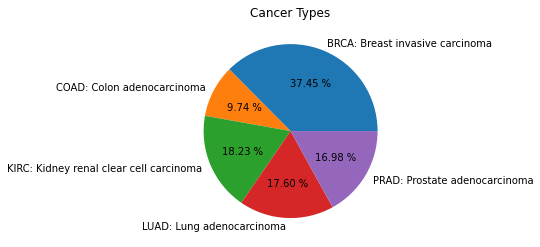

In [15]:
#Using pie chart to visualize cancer percentage Distribution
approval_percentage=df3.groupby('Class').size()
approval_percentage


#Adding labels
labels_app=["BRCA: Breast invasive carcinoma","COAD: Colon adenocarcinoma","KIRC: Kidney renal clear cell carcinoma",
            "LUAD: Lung adenocarcinoma","PRAD: Prostate adenocarcinoma"]

#plotting
plt.pie(approval_percentage, labels=labels_app, autopct='%.2f %%')
plt.title('Cancer Types')

plt.show()

#### Data Imputation

In [16]:
#Preparing Data for imputation
df5=df4

#Exclude Strings
df5.iloc[:,1:].head(10)

gene_1    gene_2    gene_3     gene_4    gene_6   gene_12    gene_19  \
0  2.017209  3.265527  5.478487  10.431999  7.175175  2.015391   5.619994   
1  0.592732  1.588421  7.586157   9.623011  6.816049  2.466601  11.055208   
2  3.511759  4.327199  6.881787   9.870730  6.972130  1.981122   8.210248   
3  3.663618  4.507649  6.659068  10.196184  7.843375  2.874246   8.306317   
4  2.655741  2.821547  6.539454   9.738265  6.566967  2.141204  10.149150   
5  3.467853  3.581918  6.620243   9.706829  7.758510  2.516797   6.842765   
6  1.224966  1.691177  6.572007   9.640511  6.754888  3.023841   7.424200   
7  2.854853  1.750478  7.226720   9.758691  5.952103  2.405856   7.373431   
8  3.992125  2.772730  6.546692  10.488252  7.690222  2.579977  10.147625   
9  3.642494  4.423558  6.849511   9.464466  7.947216  2.296311   7.856780   

    gene_20    gene_22    gene_27  ...  gene_20520  gene_20521  gene_20522  \
0  1.334282   9.796088  10.839070  ...    7.205236    4.926711    8.210257   
1  3.562621  10.070470   8.522476  ...   10.639259    4.593372    7.323865   
2  4.195285   8.970920   9.861616  ...   10.336027    5.125213    8.127123   
3  3.573556   8.524616   9.511573  ...    9.194823    6.076566    8.792959   
4  2.967630   8.047238   8.821535  ...    9.298775    5.996032    8.891425   
5  2.809661   7.663935   9.628387  ...    7.831035    5.726657    8.602588   
6  1.224966   9.973640   9.508977  ...    6.830293    5.105904    7.927968   
7  2.304861   8.922008   9.406279  ...    6.460507    5.297833    8.277092   
8  4.287908   8.343976   7.600537  ...   10.461326    6.721974    9.597533   
9  1.204141   6.020051   9.871312  ...    8.267213    6.020051    8.712809   

   gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
0    9.723516    7.220030    9.119813   12.003135    9.650743    8.921326   
1    9.740931    6.256586    8.381612   12.674552   10.517059    9.397854   
2   10.908640    5.401607    9.911597    9.045255    9.788359   10.090470   
3   10.141520    8.942805    9.601208   11.392682    9.694814    9.684365   
4   10.373790    7.181162    9.846910   11.922439    9.217749    9.461191   
5    9.928339    6.096154    9.816001   11.556995    9.244150    9.836473   
6    9.673966    1.877744    9.802692   13.256060    9.664486    9.244219   
7    9.599230    5.244290    9.994339   12.670377    9.987733    9.216872   
8    9.763753    7.933278   10.952880   12.498919   10.389954   10.390255   
9   10.259096    6.131583    9.923582   11.144295    9.244851    9.484299   

   gene_20529  
0    5.286759  
1    2.094168  
2    1.683023  
3    3.292001  
4    5.110372  
5    5.355133  
6    8.330912  
7    6.551490  
8    7.828321  
9    4.759151  

[10 rows x 16210 columns]

In [17]:
from sklearn.impute import SimpleImputer

#Using mean as Data imputation strategy
mean_imputer = SimpleImputer(strategy='mean')

#The dataframe will be converted to npArrays
df5_imp=df5.iloc[:,1:]
df5_imp=mean_imputer.fit_transform(df5_imp)
df5_imp

array([[ 2.01720929,  3.26552691,  5.47848651, ...,  9.65074302,
         8.92132623,  5.28675919],
       [ 0.59273209,  1.58842082,  7.58615674, ..., 10.51705912,
         9.39785429,  2.09416849],
       [ 3.51175898,  4.32719872,  6.88178696, ...,  9.78835945,
        10.09046974,  1.68302267],
       ...,
       [ 3.24958187,  3.70749166,  8.18590123, ..., 10.68119448,
         9.46671072,  4.6774575 ],
       [ 2.59033853,  2.78797567,  7.31862415, ..., 10.33551318,
        10.40058062,  5.71875068],
       [ 2.32524248,  3.80593214,  6.53024557, ..., 10.60735806,
         9.84479363,  4.55071601]])

In [18]:
#Converting npArray to Pandas Dataframe 
dff=df5.iloc[:,1:]
Clmns=dff.columns

#Using Column name from previous dataframe (df5)
df6=pd.DataFrame(data=df5_imp, columns=Clmns)

#Double checking if it matches with 
df6.head(10)

gene_1    gene_2    gene_3     gene_4    gene_6   gene_12    gene_19  \
0  2.017209  3.265527  5.478487  10.431999  7.175175  2.015391   5.619994   
1  0.592732  1.588421  7.586157   9.623011  6.816049  2.466601  11.055208   
2  3.511759  4.327199  6.881787   9.870730  6.972130  1.981122   8.210248   
3  3.663618  4.507649  6.659068  10.196184  7.843375  2.874246   8.306317   
4  2.655741  2.821547  6.539454   9.738265  6.566967  2.141204  10.149150   
5  3.467853  3.581918  6.620243   9.706829  7.758510  2.516797   6.842765   
6  1.224966  1.691177  6.572007   9.640511  6.754888  3.023841   7.424200   
7  2.854853  1.750478  7.226720   9.758691  5.952103  2.405856   7.373431   
8  3.992125  2.772730  6.546692  10.488252  7.690222  2.579977  10.147625   
9  3.642494  4.423558  6.849511   9.464466  7.947216  2.296311   7.856780   

    gene_20    gene_22    gene_27  ...  gene_20520  gene_20521  gene_20522  \
0  1.334282   9.796088  10.839070  ...    7.205236    4.926711    8.210257   
1  3.562621  10.070470   8.522476  ...   10.639259    4.593372    7.323865   
2  4.195285   8.970920   9.861616  ...   10.336027    5.125213    8.127123   
3  3.573556   8.524616   9.511573  ...    9.194823    6.076566    8.792959   
4  2.967630   8.047238   8.821535  ...    9.298775    5.996032    8.891425   
5  2.809661   7.663935   9.628387  ...    7.831035    5.726657    8.602588   
6  1.224966   9.973640   9.508977  ...    6.830293    5.105904    7.927968   
7  2.304861   8.922008   9.406279  ...    6.460507    5.297833    8.277092   
8  4.287908   8.343976   7.600537  ...   10.461326    6.721974    9.597533   
9  1.204141   6.020051   9.871312  ...    8.267213    6.020051    8.712809   

   gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
0    9.723516    7.220030    9.119813   12.003135    9.650743    8.921326   
1    9.740931    6.256586    8.381612   12.674552   10.517059    9.397854   
2   10.908640    5.401607    9.911597    9.045255    9.788359   10.090470   
3   10.141520    8.942805    9.601208   11.392682    9.694814    9.684365   
4   10.373790    7.181162    9.846910   11.922439    9.217749    9.461191   
5    9.928339    6.096154    9.816001   11.556995    9.244150    9.836473   
6    9.673966    1.877744    9.802692   13.256060    9.664486    9.244219   
7    9.599230    5.244290    9.994339   12.670377    9.987733    9.216872   
8    9.763753    7.933278   10.952880   12.498919   10.389954   10.390255   
9   10.259096    6.131583    9.923582   11.144295    9.244851    9.484299   

   gene_20529  
0    5.286759  
1    2.094168  
2    1.683023  
3    3.292001  
4    5.110372  
5    5.355133  
6    8.330912  
7    6.551490  
8    7.828321  
9    4.759151  

[10 rows x 16210 columns]

In [19]:
#Checking if we still have any NaN
null_df6=df6.isnull().sum()>0

#Creating a list
null_df6_01=pd.DataFrame(null_df6).drop(null_df6.index[0]).reset_index()
null_df6_01.columns = ['Gene no','status']

#Grouping
null_df6_01.groupby('status').size()

status
False    16209
dtype: int64

#### New Dataframe with no missing values

In [20]:
#Adding Classification column to the dataframe
df7=pd.concat([df2.drop(columns=["Unnamed: 0"]), df6], axis=1)

#New Dataframe with no missing values
df7.head(10)

Class    gene_1    gene_2    gene_3     gene_4    gene_6   gene_12  \
0  PRAD  2.017209  3.265527  5.478487  10.431999  7.175175  2.015391   
1  LUAD  0.592732  1.588421  7.586157   9.623011  6.816049  2.466601   
2  PRAD  3.511759  4.327199  6.881787   9.870730  6.972130  1.981122   
3  PRAD  3.663618  4.507649  6.659068  10.196184  7.843375  2.874246   
4  BRCA  2.655741  2.821547  6.539454   9.738265  6.566967  2.141204   
5  PRAD  3.467853  3.581918  6.620243   9.706829  7.758510  2.516797   
6  KIRC  1.224966  1.691177  6.572007   9.640511  6.754888  3.023841   
7  PRAD  2.854853  1.750478  7.226720   9.758691  5.952103  2.405856   
8  BRCA  3.992125  2.772730  6.546692  10.488252  7.690222  2.579977   
9  PRAD  3.642494  4.423558  6.849511   9.464466  7.947216  2.296311   

     gene_19   gene_20    gene_22  ...  gene_20520  gene_20521  gene_20522  \
0   5.619994  1.334282   9.796088  ...    7.205236    4.926711    8.210257   
1  11.055208  3.562621  10.070470  ...   10.639259    4.593372    7.323865   
2   8.210248  4.195285   8.970920  ...   10.336027    5.125213    8.127123   
3   8.306317  3.573556   8.524616  ...    9.194823    6.076566    8.792959   
4  10.149150  2.967630   8.047238  ...    9.298775    5.996032    8.891425   
5   6.842765  2.809661   7.663935  ...    7.831035    5.726657    8.602588   
6   7.424200  1.224966   9.973640  ...    6.830293    5.105904    7.927968   
7   7.373431  2.304861   8.922008  ...    6.460507    5.297833    8.277092   
8  10.147625  4.287908   8.343976  ...   10.461326    6.721974    9.597533   
9   7.856780  1.204141   6.020051  ...    8.267213    6.020051    8.712809   

   gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
0    9.723516    7.220030    9.119813   12.003135    9.650743    8.921326   
1    9.740931    6.256586    8.381612   12.674552   10.517059    9.397854   
2   10.908640    5.401607    9.911597    9.045255    9.788359   10.090470   
3   10.141520    8.942805    9.601208   11.392682    9.694814    9.684365   
4   10.373790    7.181162    9.846910   11.922439    9.217749    9.461191   
5    9.928339    6.096154    9.816001   11.556995    9.244150    9.836473   
6    9.673966    1.877744    9.802692   13.256060    9.664486    9.244219   
7    9.599230    5.244290    9.994339   12.670377    9.987733    9.216872   
8    9.763753    7.933278   10.952880   12.498919   10.389954   10.390255   
9   10.259096    6.131583    9.923582   11.144295    9.244851    9.484299   

   gene_20529  
0    5.286759  
1    2.094168  
2    1.683023  
3    3.292001  
4    5.110372  
5    5.355133  
6    8.330912  
7    6.551490  
8    7.828321  
9    4.759151  

[10 rows x 16211 columns]

#### Exporting Dataset 

In [21]:
#Export

df7.to_csv('Dataset/df_noNaN.csv')

## Selecting two features

In [21]:
from sklearn.preprocessing import LabelEncoder
#Nan 15%

cols = ['Class']
le = LabelEncoder()
for col in cols:
    df7[col] = le.fit_transform(df7[col])
df7.head(10)

Class    gene_1    gene_2    gene_3     gene_4    gene_6   gene_12  \
0      4  2.017209  3.265527  5.478487  10.431999  7.175175  2.015391   
1      3  0.592732  1.588421  7.586157   9.623011  6.816049  2.466601   
2      4  3.511759  4.327199  6.881787   9.870730  6.972130  1.981122   
3      4  3.663618  4.507649  6.659068  10.196184  7.843375  2.874246   
4      0  2.655741  2.821547  6.539454   9.738265  6.566967  2.141204   
5      4  3.467853  3.581918  6.620243   9.706829  7.758510  2.516797   
6      2  1.224966  1.691177  6.572007   9.640511  6.754888  3.023841   
7      4  2.854853  1.750478  7.226720   9.758691  5.952103  2.405856   
8      0  3.992125  2.772730  6.546692  10.488252  7.690222  2.579977   
9      4  3.642494  4.423558  6.849511   9.464466  7.947216  2.296311   

     gene_19   gene_20    gene_22  ...  gene_20520  gene_20521  gene_20522  \
0   5.619994  1.334282   9.796088  ...    7.205236    4.926711    8.210257   
1  11.055208  3.562621  10.070470  ...   10.639259    4.593372    7.323865   
2   8.210248  4.195285   8.970920  ...   10.336027    5.125213    8.127123   
3   8.306317  3.573556   8.524616  ...    9.194823    6.076566    8.792959   
4  10.149150  2.967630   8.047238  ...    9.298775    5.996032    8.891425   
5   6.842765  2.809661   7.663935  ...    7.831035    5.726657    8.602588   
6   7.424200  1.224966   9.973640  ...    6.830293    5.105904    7.927968   
7   7.373431  2.304861   8.922008  ...    6.460507    5.297833    8.277092   
8  10.147625  4.287908   8.343976  ...   10.461326    6.721974    9.597533   
9   7.856780  1.204141   6.020051  ...    8.267213    6.020051    8.712809   

   gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
0    9.723516    7.220030    9.119813   12.003135    9.650743    8.921326   
1    9.740931    6.256586    8.381612   12.674552   10.517059    9.397854   
2   10.908640    5.401607    9.911597    9.045255    9.788359   10.090470   
3   10.141520    8.942805    9.601208   11.392682    9.694814    9.684365   
4   10.373790    7.181162    9.846910   11.922439    9.217749    9.461191   
5    9.928339    6.096154    9.816001   11.556995    9.244150    9.836473   
6    9.673966    1.877744    9.802692   13.256060    9.664486    9.244219   
7    9.599230    5.244290    9.994339   12.670377    9.987733    9.216872   
8    9.763753    7.933278   10.952880   12.498919   10.389954   10.390255   
9   10.259096    6.131583    9.923582   11.144295    9.244851    9.484299   

   gene_20529  
0    5.286759  
1    2.094168  
2    1.683023  
3    3.292001  
4    5.110372  
5    5.355133  
6    8.330912  
7    6.551490  
8    7.828321  
9    4.759151  

[10 rows x 16211 columns]

In [22]:
sc=StandardScaler()
df8=df7.iloc[:, 0: 200]
sc.fit_transform(df8)

array([[ 1.52331389e+00, -1.07521862e+00,  1.39469917e-01, ...,
         1.51569585e-03, -1.72082213e+00, -3.13390519e-02],
       [ 8.69765723e-01, -2.44897304e+00, -1.49751480e+00, ...,
         3.56575418e-01,  1.33038016e+00,  8.43465810e-01],
       [ 1.52331389e+00,  3.66113144e-01,  1.17574337e+00, ...,
        -1.63358074e+00, -2.68476590e-01, -2.72664727e+00],
       ...,
       [-4.37330607e-01,  1.13271635e-01,  5.70861553e-01, ...,
        -6.34487164e-01,  9.34415436e-01,  1.72076590e+00],
       [ 1.52331389e+00, -5.22497363e-01, -3.26656876e-01, ...,
         2.27404529e+00, -1.81076275e+00,  1.41752285e-01],
       [ 1.52331389e+00, -7.78153874e-01,  6.66947039e-01, ...,
         3.90985939e-01, -4.28079706e-01,  6.84991614e-02]])

## Selecting 2 Features [Gene_89 + Gene_221]

In [44]:
cor_matrix =df8.corr().round(2) 
fig = plt.figure(figsize=(150,150))
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111)) 
plt.show()

In [31]:
df8.values.argsort()

array([[ 55, 100,  75, ..., 164, 186, 184],
       [ 35,  31, 167, ..., 191, 184, 186],
       [ 78,  59,  34, ...,  57, 186, 184],
       ...,
       [  0,  53, 151, ...,  14, 186, 184],
       [ 55,  33, 151, ..., 186, 164, 184],
       [ 78,  34,   6, ...,  14, 186, 184]], dtype=int64)